# SYRIATEL CUSTOMER CHURN PREDICTION: A SUPERVISED LEARNING APPROACH.

PROJECT BY: Kelvin Kipyegon Rotich

## INTRODUCTION

Welcome to this project on predicting customer churn at SyriaTel, a telecommunications company based in the United States. In this project, we will be focused on supervised learning algorithms and choose the best one which will predict whether a customer will churn or not. This is based on a comprehensive dataset which contains several factors which may or may not influence a customer to stop using SyriaTel as its telecommunications service provider.

The main purpose of this project is to create a predictive model that accurately classifies whether a customer will churn or not. This project aims to provide insights to SyriaTel stakeholders and in turn they will make informed decisions which will mitigate customer churn effects in the company revenue.

In the following sections we will delve into the project's methodology, key findings and the models' performance in predicting customer churn.



## PROJECT OVERVIEW

### Telecommunications industry background in the USA.

The telecommunication industry in the United States has evolved significantly over the years, playong a pivotal role in shaping the nation's communication landscape. Ever since the first telegraph was created in the mid 19th century, the industry has been witness to a continous series of technological advancements. 

The advent of the telephone services in the late 1800s marked a transformative era. The mid-20th century saw the rise of microwave and satelite technologies which facilitated long-distance communication. The divestiture of AT&T in 1984 led to increased competition, paving the way for creation of new telecommunication companies in the United States.

The late 20th century and early 21st century saw the proliferation of mobile communications, with the emergence of wireless networks and the widespread adoption of smartphones. This period also saw the expansion of broadband internet services, enabling high-speed data transformations.

Regulatory changes, like the Telecommunications Act of 1996, aimed to foster competition and innovation by breaking down monopolistic structures. As a result, numerous players like SyriaTel entered the market, offering diverse services ranging from traditional landline telephone to broadband internet, cable television and mobile services.

Today, the U.S. Telecommunications industry continues to be dynamic, with ongoing advancements in 5G technology, fiber-optic networks, and the convergence of services. Major companies in the industry have played central roles, contributing to the nation's connectivity and driving innovation in communication technologies.

### Problem Statement.

SyriaTel is grappling with the issue of customer churn. Despite offering a range of services, the company is experiencing a significant increase in customer attrition, leading to a decline in overall revenue and customer satisfaction and all because of customer churn. The company seeks to proactively predict customer churn, allowing for targeted retention strategies and ultimately reducing customer attrition rates to enhance overall long-term business sustainability in the dynamic telecommunications industry. 

### Objectives.

1. To investigate each feature and check for patterns. This will help in identifying features to be used in creating the models. It will also help in identifying distributions of numerical features and count the unique values in each feature for categorical features.
2. To investigate the relationship between the feature variables and the target variable. This will try to identify the patterns that may lead to customer churn. This will also help in filtering some of the features to be used in modelling.
3. To check the relationship between numerical features. This will determine the models to be used for this project.
4. To create a precise model that will be used to predict customer churn depending on a range of features.

### Importing the necessary libraries

In [176]:
# Importing libraries.

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score

## DATA UNDERSTANDING.

In [177]:
# Function to load and examine the data

def load_and_examine_data(file_path):
    try:
        # Load the data from the specified file path
        data = pd.read_csv(file_path)

        # Display the shape, columns and the first few rows of the dataset
        print("----------------------------Details about the data----------------------------\n")
        print("----------------------------Shape of the dataset----------------------------\n")
        display(data.shape)
        print()
        print("----------------------------Columns of the dataset----------------------------\n")
        display(data.columns)
        print()
        print("----------------------------Head of the dataset----------------------------\n")
        display(data.head())
        print()
        # Display information about the dataset
        print("\n----------------------------Data information ----------------------------\n")
        display(data.info())
        print("\n----------------------------Descriptive Statistics of the dataset ----------------------------\n")
        display(data.describe())

        return data

    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Replace with your data file path
file_path = "customer_churn.csv" 
data = load_and_examine_data(file_path)

----------------------------Details about the data----------------------------

----------------------------Shape of the dataset----------------------------



(3333, 21)


----------------------------Columns of the dataset----------------------------



Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


----------------------------Head of the dataset----------------------------



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False




----------------------------Data information ----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minu

None


----------------------------Descriptive Statistics of the dataset ----------------------------



,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The dataset contains customers of SyriaTel and their information including whether they have churned or not. It contains 21 columns with 3333 entries.

Additional column information:

* `state`(object): The state where the customer comes from.
* `account length`(int): The number of months the customer has stayed with SyriaTel.
* `area code`(int): The telephone area code the customer lives in.
* `phone number`(object): The customer's phone number.
* `international plan`(object): Whether the customer has an international plan or not.
* `voice mail plan`(object): Whether the customer has a voicemail plan or not.
* `number vmail messages`(int): The number of voicemail messages the customer has.
* `total day minutes`(float): The number of minutes the customer spends on calls during the day.
* `total day calls`(int): The number of calls the customer makes during the day.
* `total day charge`(float): The amount the customer is charged from calls during the day.
* `total eve minutes`(float): The number of minutes the customer spends on calls in the evening.
* `total eve calls`(int): The number of calls the customer makes in the evening.
* `total eve charge`(float): The amount the customer is charged from calls in the evening.
* `total night minutes`(float): The number of minutes the customer spends on calls at night.
* `total night calls`(int): The number of calls the customer makes at night.
* `total night charge`(float): The amount the customer is charged from calls at night.
* `total intl minutes`(float): The number of minutes the customer spends on international calls.
* `total intl calls`(int): The number of international calls the customer makes.
* `total intl charge`(float): The amount the customer is charged from international calls.
* `customer service calls`(int): The number of customer service calls the customer has ever made.
* `churn`(bool): Whether the customer has churned or not.


## DATA PREPARATION

### Checking for missing, duplicated and placeholder values.

We will begin the data cleaning by checking for missing, duplicated and placeholder values in the dataset. One function will be used to check for them.

In [178]:
# Creating a function that returns null, duplicated and placeholder values in the dataset.

def data_prep(df):
    print('-------------------------Missing Values Check---------------------------------------\n')
    print(f'Number of null values in each column in the dataset:\n{df.isnull().sum()}\n')
    print('-------------------------Duplicated Values Check------------------------------------\n')
    print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}\n')
    print('-------------------------Placeholder Values Check-----------------------------------\n')
    for column in df.columns:
        unique_values = df[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
        placeholder_count = len(placeholders)
    
        print(f"Column: '{column}'")
        print(f"Placeholders found: {placeholders}")
        print(f"Count of placeholders: {placeholder_count}\n")
# Checking in our dataset.
data_prep(data)
    

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'state'
Placeholders found: []
C

Based on the above, it can be seen that our dataset has no null, duplicated and placeholder values. We will now go ahead and check on the outliers.

### Outliers

We will now check the outliers in the dataset. This will be done with the use of a function and boxplots.

In [179]:
# Creating a function that checks for outliers in the dataset.
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr

        # Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data.select_dtypes(include = ['number'])
check_outliers(data, columns_to_check)

account length
Number of outliers: 18

area code
Number of outliers: 0

number vmail messages
Number of outliers: 1

total day minutes
Number of outliers: 25

total day calls
Number of outliers: 23

total day charge
Number of outliers: 25

total eve minutes
Number of outliers: 24

total eve calls
Number of outliers: 20

total eve charge
Number of outliers: 24

total night minutes
Number of outliers: 30

total night calls
Number of outliers: 22

total night charge
Number of outliers: 30

total intl minutes
Number of outliers: 46

total intl calls
Number of outliers: 78

total intl charge
Number of outliers: 49

customer service calls
Number of outliers: 267



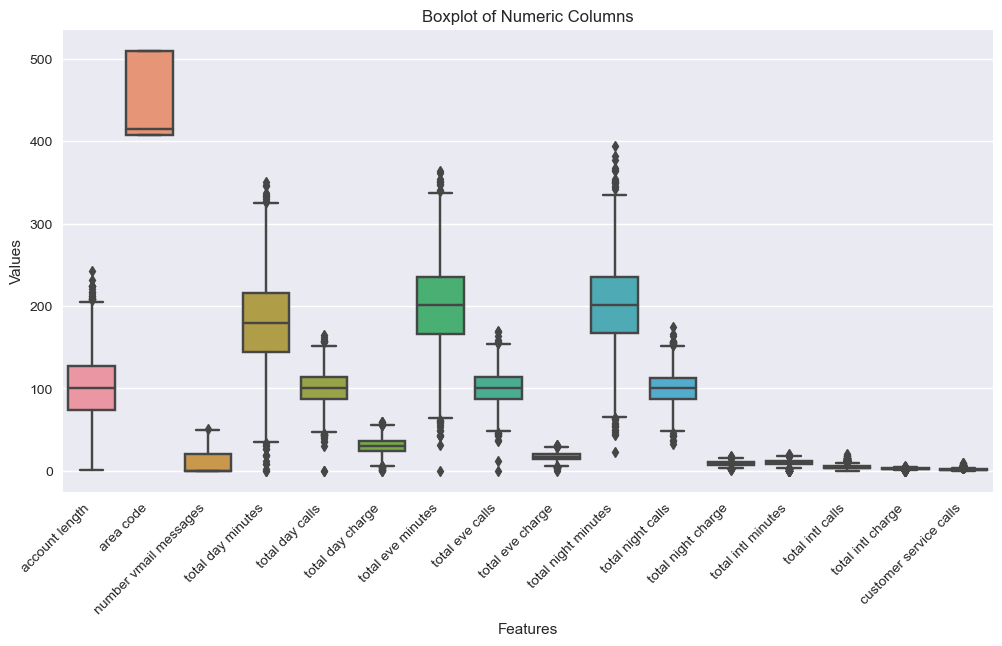

In [180]:
# Plotting a boxplot to check for outliers
features_to_plot = data.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

There are outliers present in our dataset. However, we will choose to retain them rather than drop them. This is because they are genuine events that take place and they may or may not affect customer churn. 

### Changing column data types.

Based on the information of the dataset columns, we see that we don't need to change the data type of any column. An argument may be made on the `phone number` column but that will make us lose the authenticity of the data, since that is how phone numbers are written in the United States.

With that, we can conclude data preparation and head to Exploratory Data Analysis.

## EXPLORATORY DATA ANALYSIS.

### Univariate Analysis.

We will analyse each column individually. We will begin with the numeric columns and create histograms which will show us the distributions of the features.

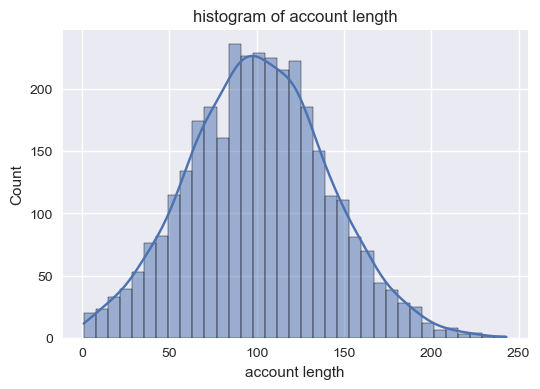

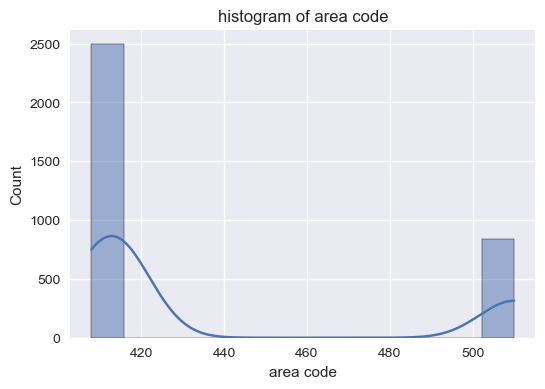

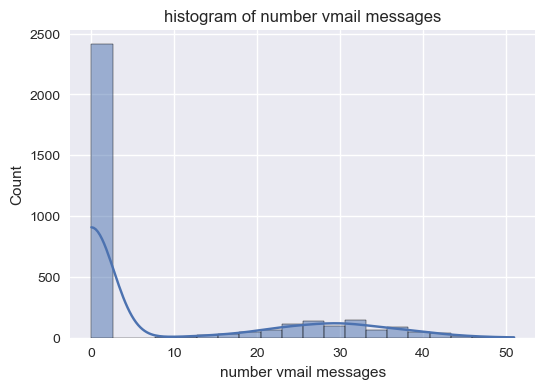

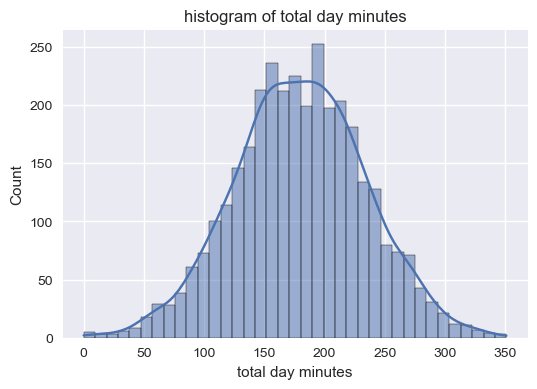

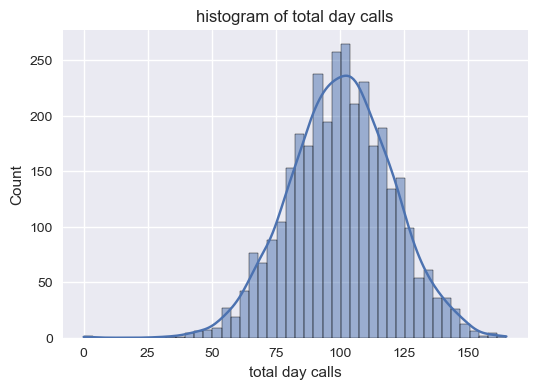

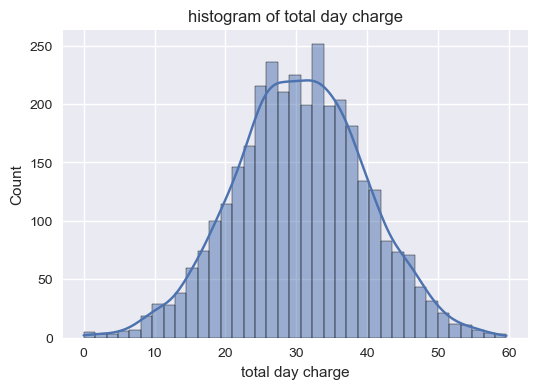

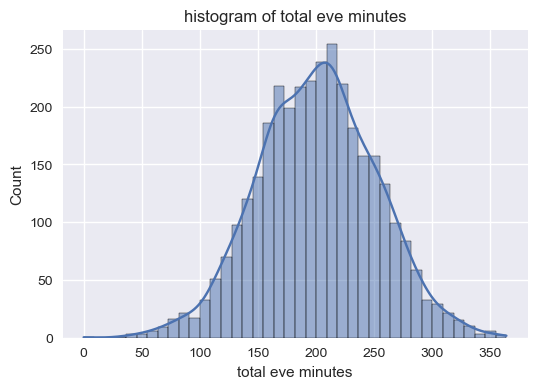

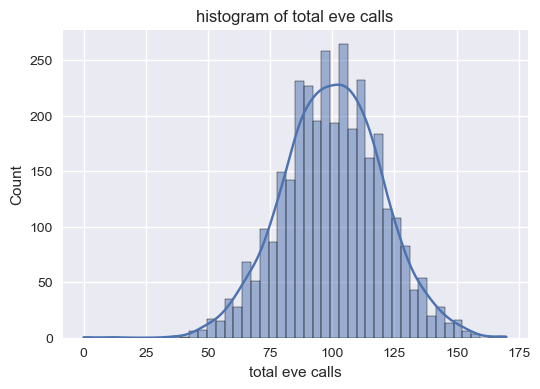

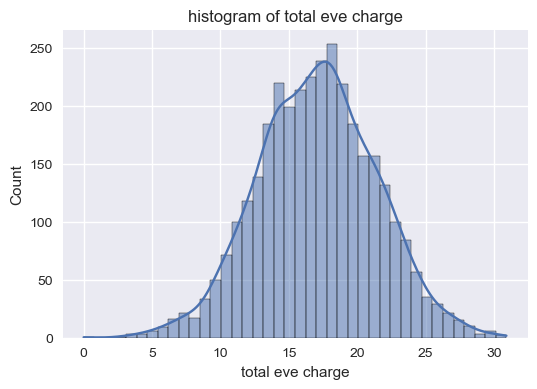

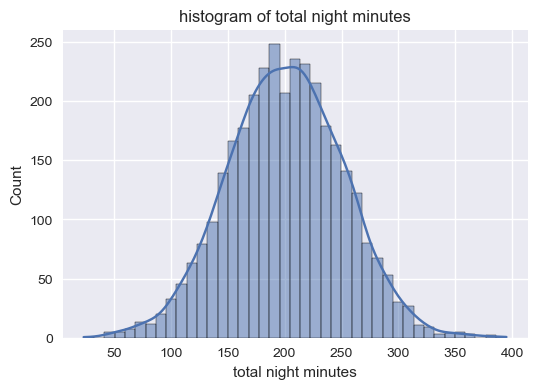

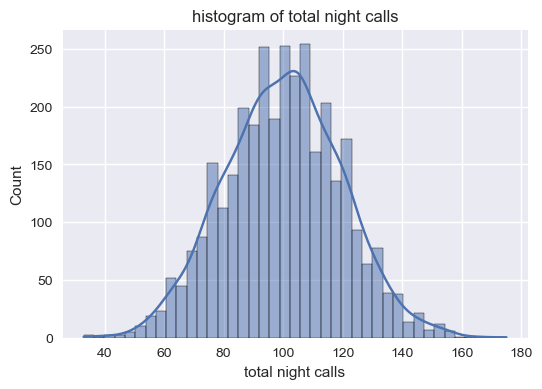

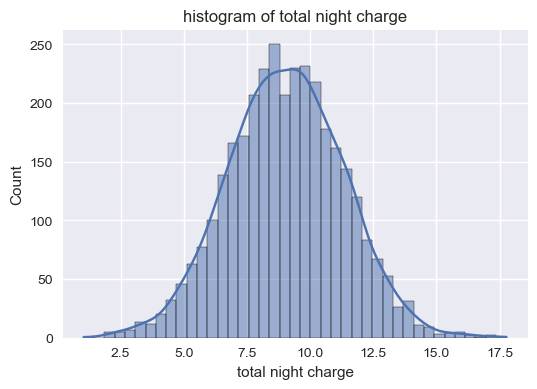

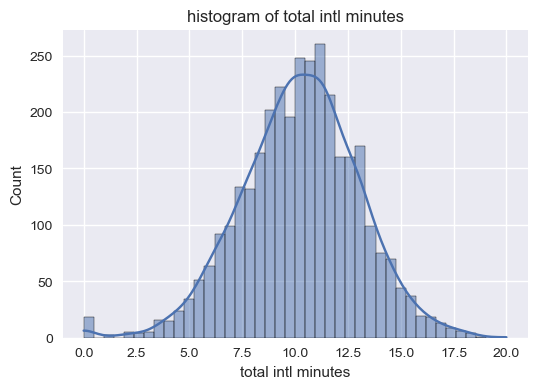

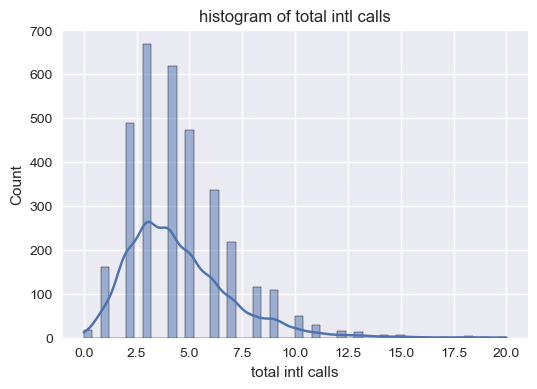

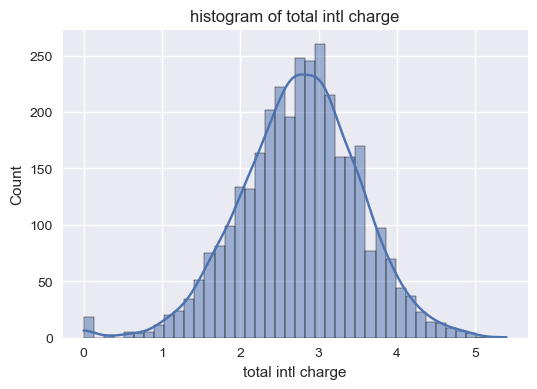

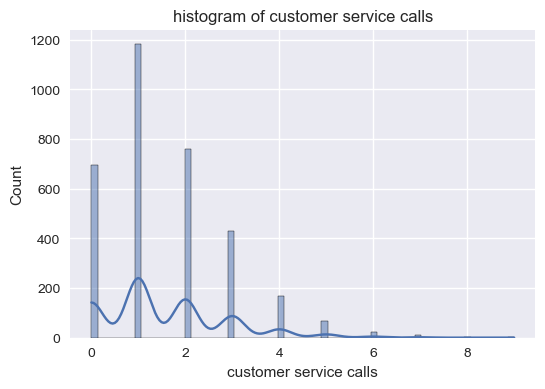

In [181]:
# Creating histograms for selected columns

# Identify numerical columns
numeric_columns = data.select_dtypes(include=['number'])

# Iterate over numerical columns and create histograms
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=numeric_columns, x=column, bins = 'auto', common_norm = False, kde = True)
    plt.title(f"histogram of {column}")
    plt.show()

We can see that most of the columns contain have a normal distribution. Those that do not have a normal distribution have discrete distributions. We will have to normalize our data in the data preprocessing part for those features without a normal distribution.

We can now check the categorical data. We will check the number of unique values in each column to see the columns we won't use in our models.

In [182]:
# Checking number of unique values in each categorical column.
categorical_columns = data.select_dtypes(include=['object', 'bool'])
for column in categorical_columns.columns:
    print(f'\n{column}\n{data[column].nunique()}')
    if data[column].nunique() == data.shape[0]:
        print(f'{column} is a feature to be dropped.')


state
51

phone number
3333
phone number is a feature to be dropped.

international plan
2

voice mail plan
2

churn
2


We can see the number of the `phone number` is equal to the number of rows in our dataset. This means we will have to drop it during the preprocessing stage because it seems that it is unique for each customer and it means that it might not bring any effect to the models we create. We can create the countplots of the remaining columns.

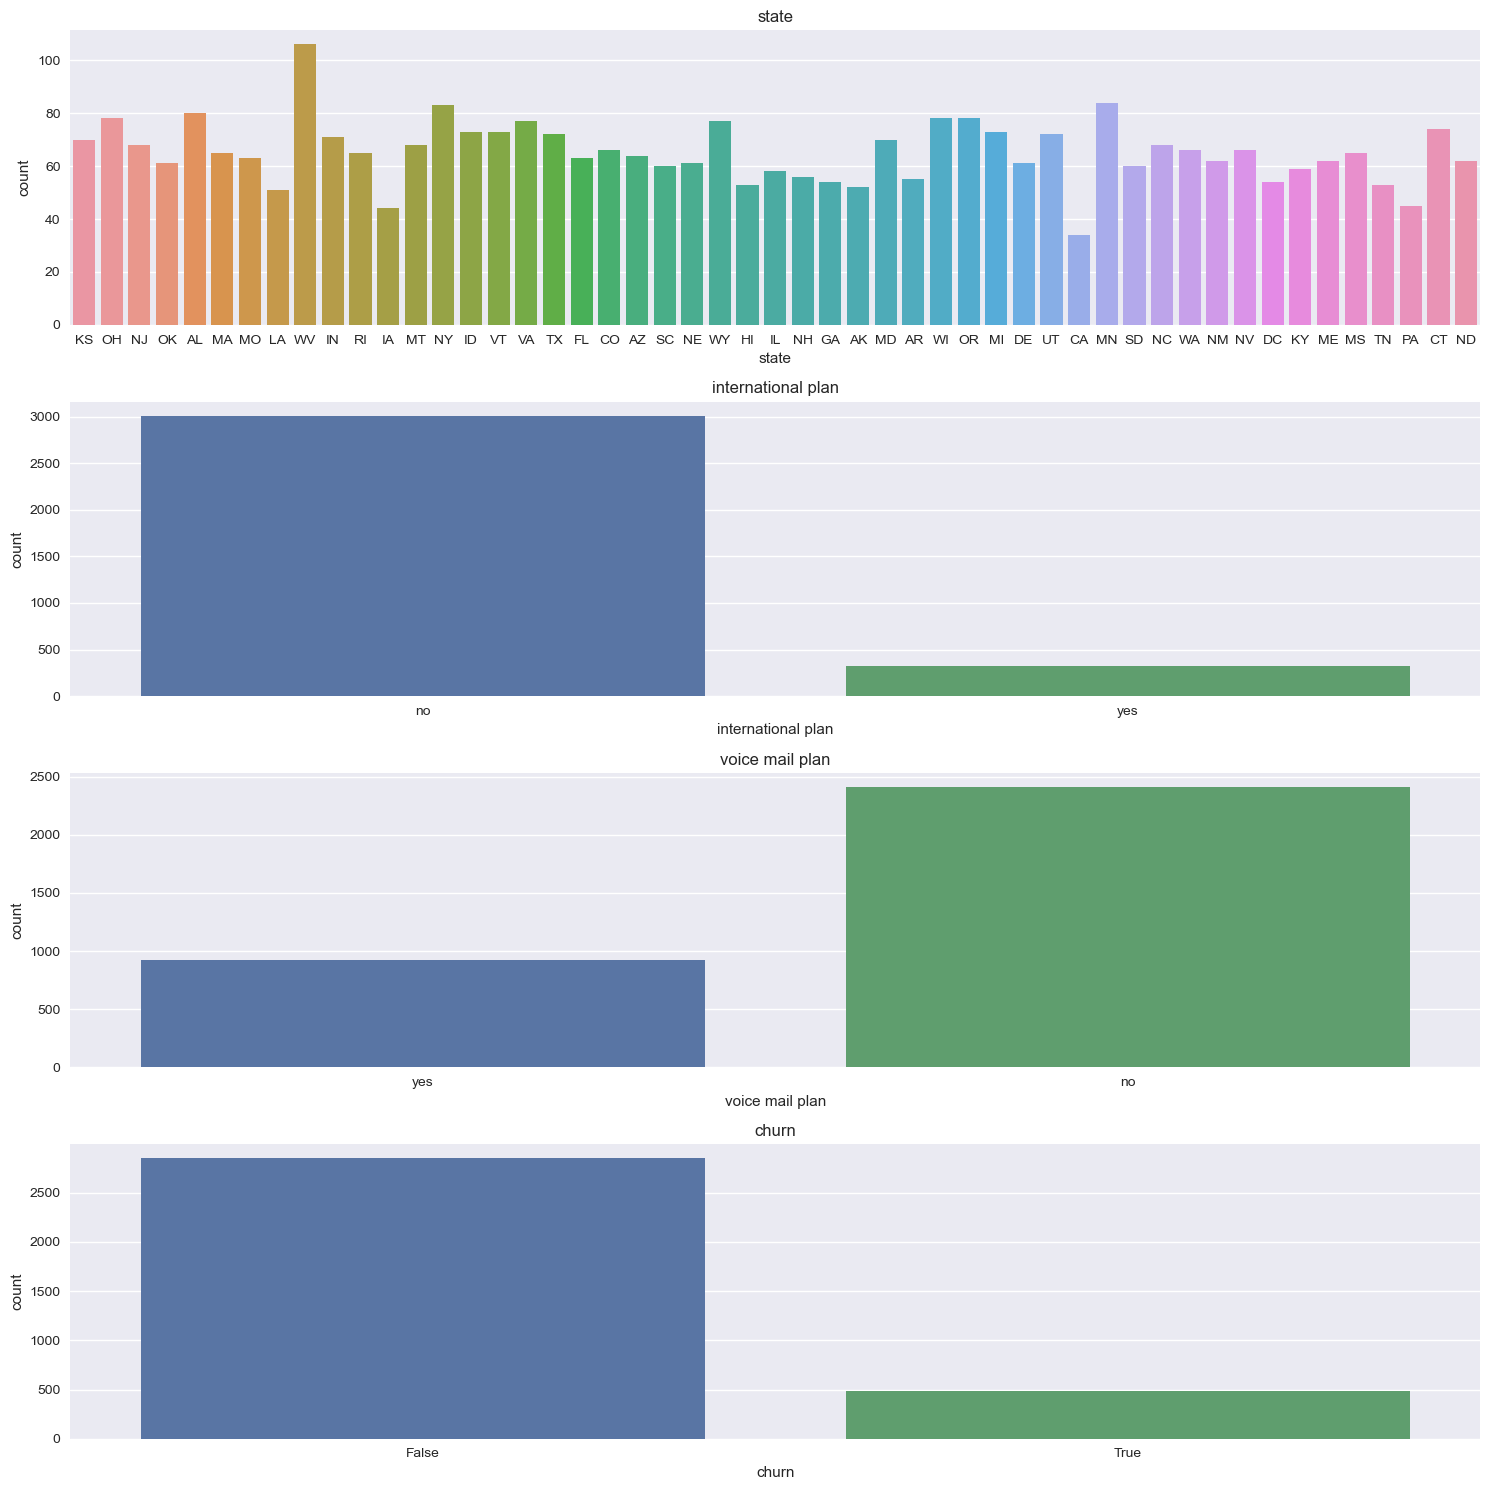

In [183]:
# Dropping the phone number column from the categorical_columns dataframe
categorical_columns = categorical_columns.drop(['phone number'], axis=1).columns

# Creating the countplots
# Create a figure with a grid of subplots
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(15, 15))

# Iterate over categorical columns and create countplots
for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)

# Show the plot
plt.tight_layout()
plt.show();

We can see that there are 51 states but we won't drop it. There could be a pattern of where more cases of customer churn is present by state. We can also see that most of the customers have neither an international nor a voicemail plan. It is also evident that most of the customers in the dataset have retained the services of SyriaTel.

We will now go to bivariate analysis part.

### Bivariate Analysis.

We will be comparing our features to the target which is the `churn` column. We will begin by comparing the numerical features with the target variable.

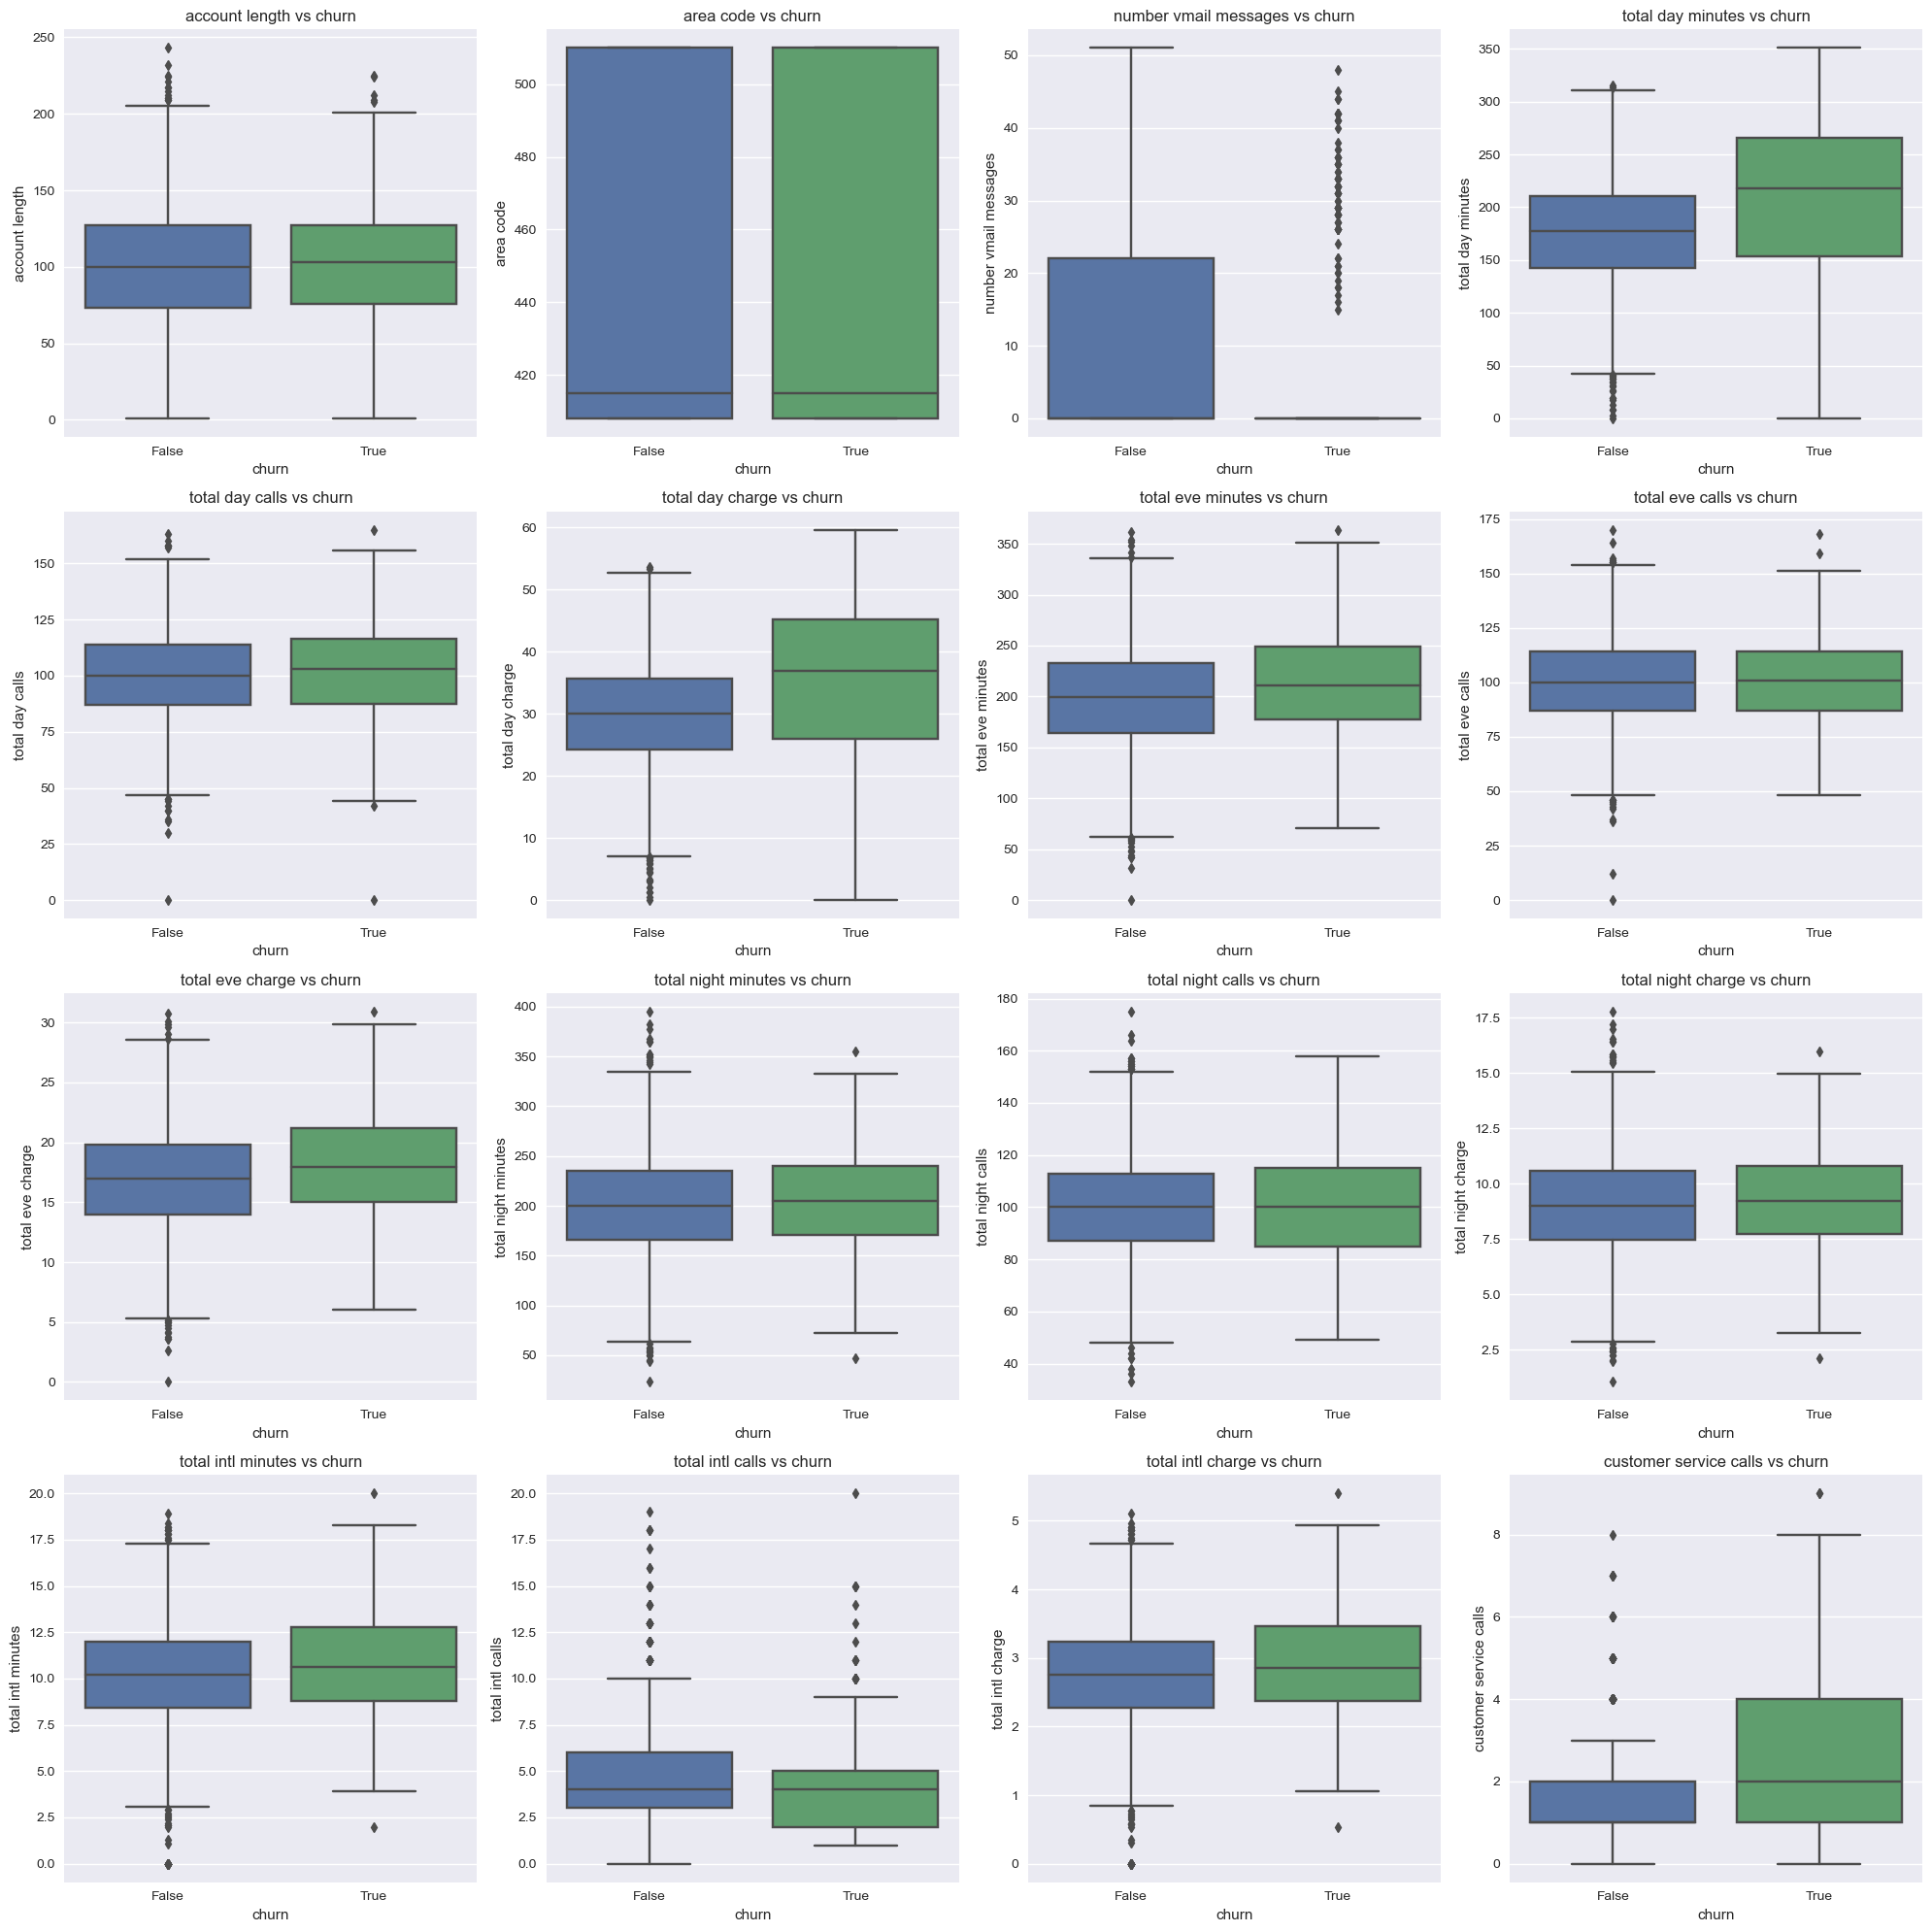

In [184]:
# Selecting the columns to be used in the plot
numeric_columns = data.select_dtypes(include=['number'])

plt.figure(figsize=(20,20))

for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='churn', y=column, data=data)
    plt.title(f'{column} vs churn')

plt.tight_layout()
plt.show();

Based on the plots we have created, we can see that `area code` has no pattern on customer churn. That means we will drop it during the preprocessing stage. We can also see that the customers who have churned have made the most customer service calls compared to those who haven't. They also incur a lot of charges during the day due to spending a lot of minutes in their calls. For the other features it seems those who have churned and those who haven't have somewhat similar patterns. We can now create a plot that compares the categorical features with the target.

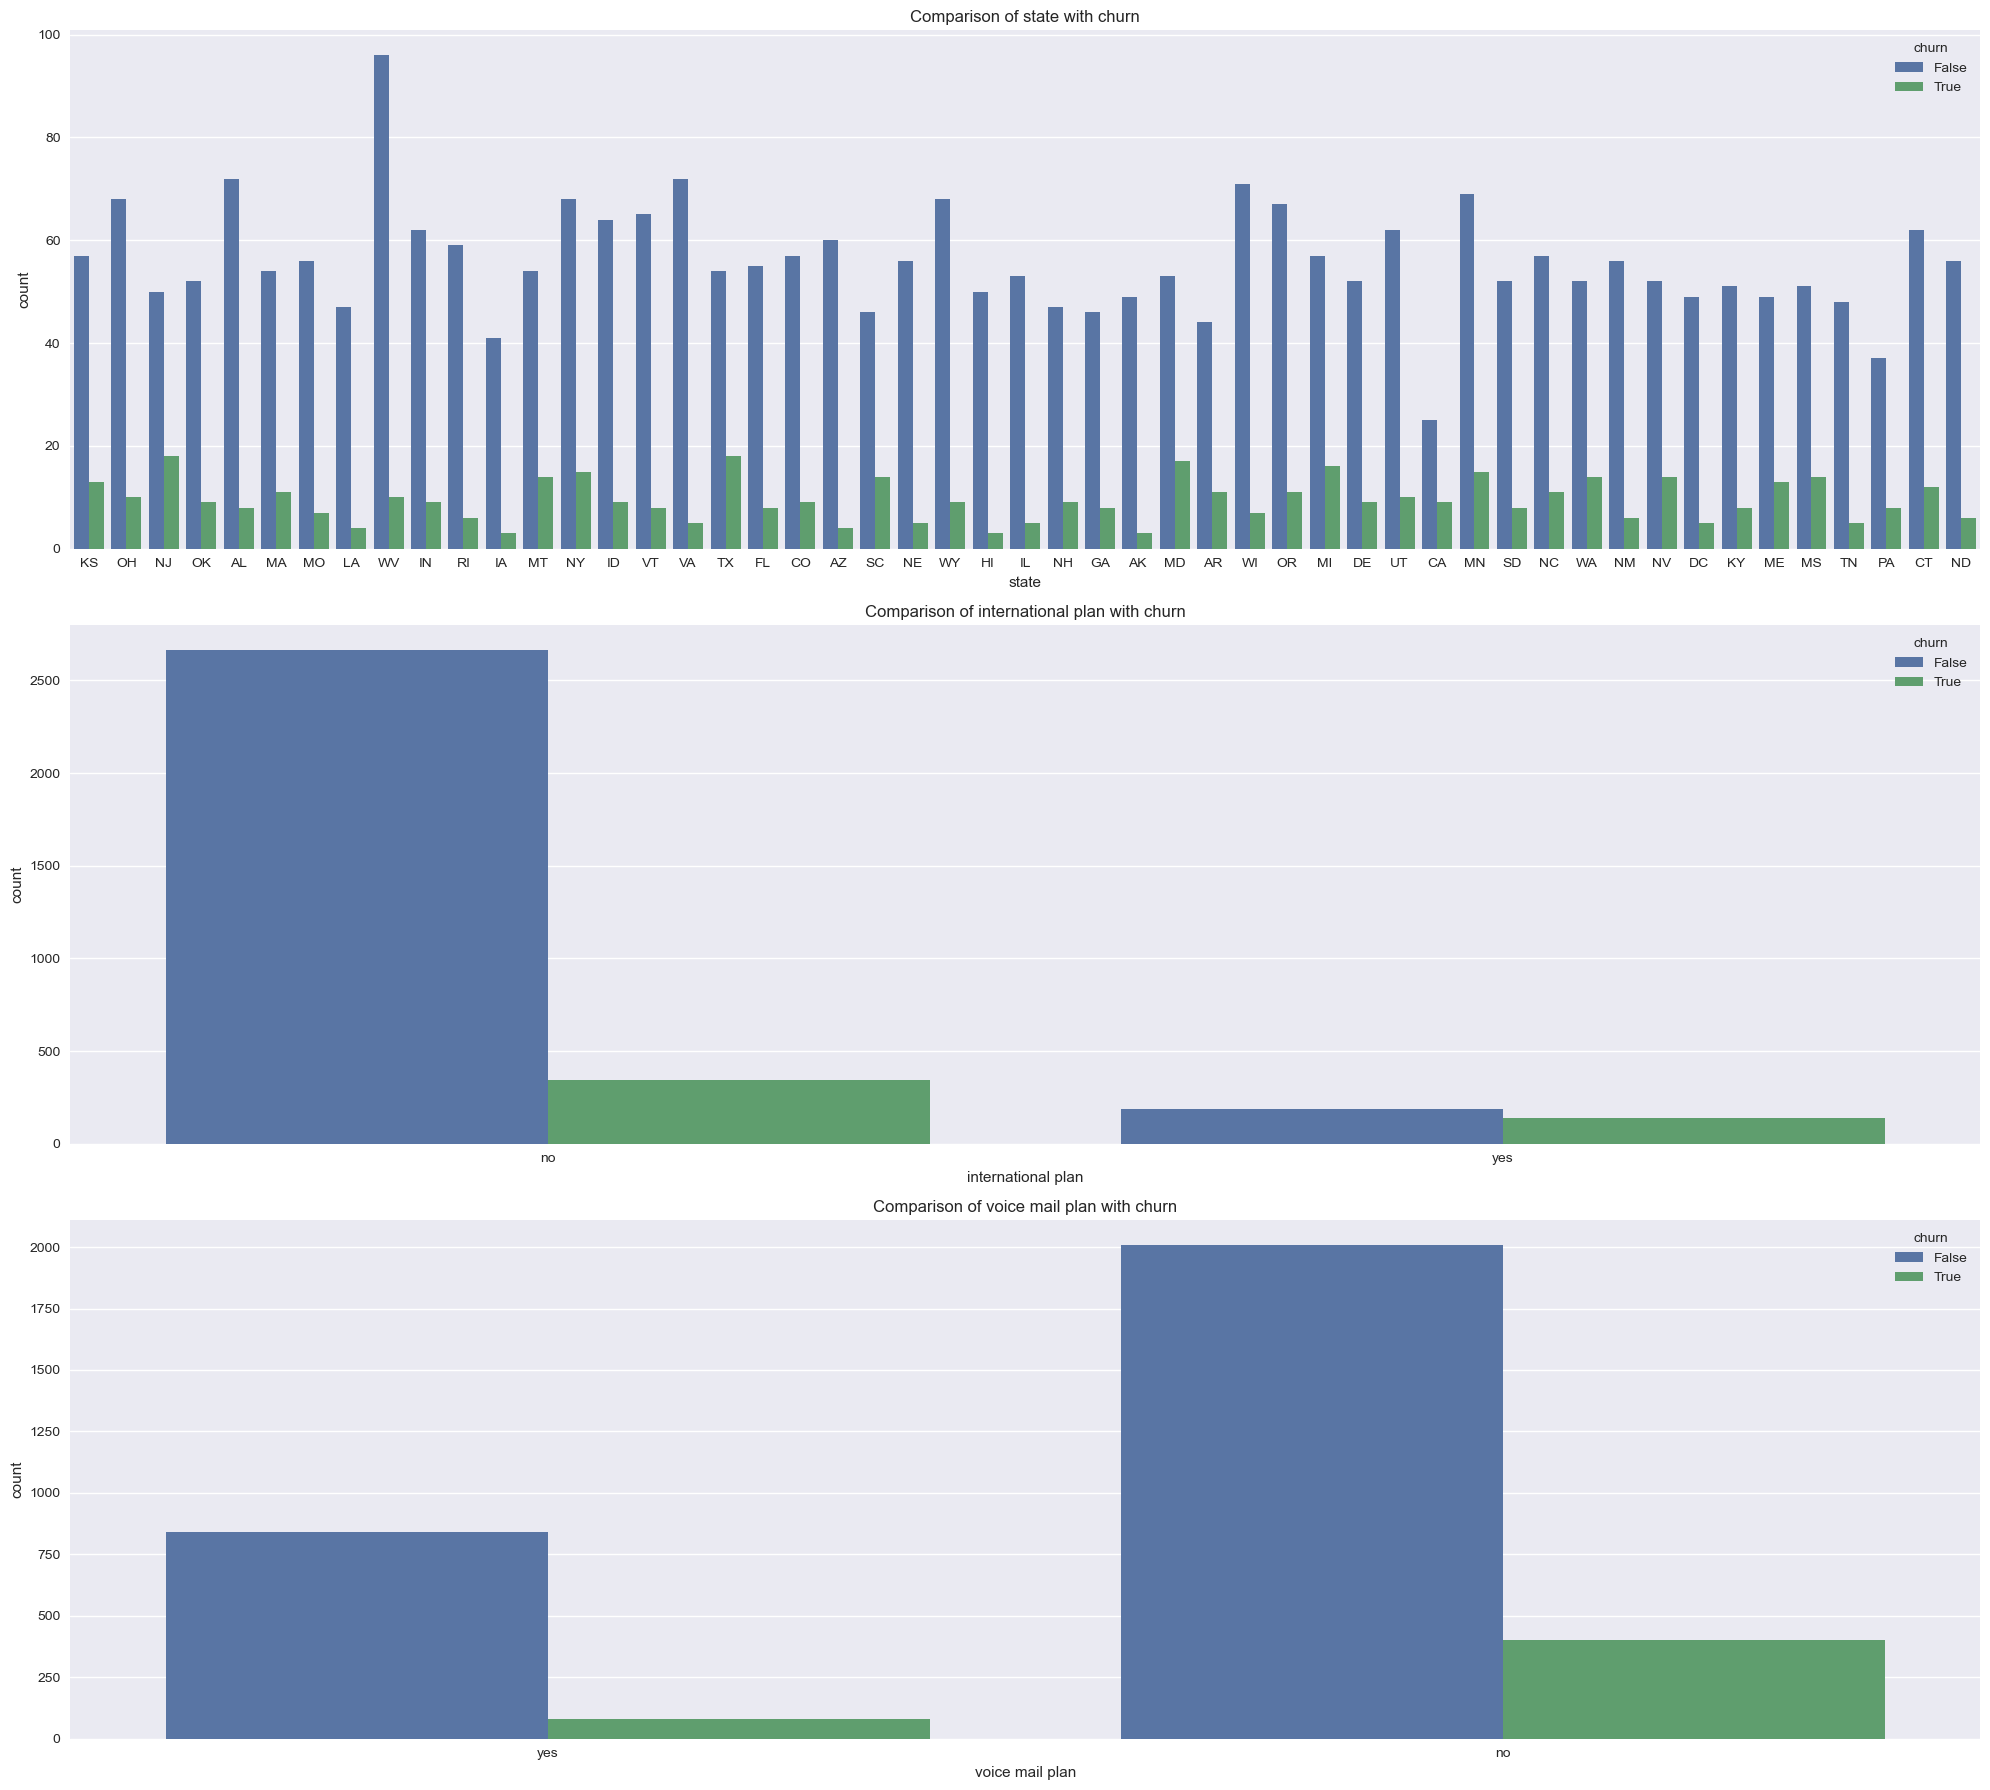

In [185]:
# Dropping the phone number column from the categorical_columns dataframe
categorical_columns = data.select_dtypes(include='object').drop(['phone number'], axis=1).columns

# Plotting the bar graphs

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(20, 6 * len(categorical_columns)))

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='churn', data=data, ax=axes[i])
    axes[i].set_title(f'Comparison of {column} with churn')

plt.tight_layout()
plt.show();


We notice that there is no pattern in the `state` column whereby the comparison in each state looks similar. That means we will drop the column in the preprocessing stage. We can also see that most of those who stopped using SyriaTel products have subscribed to neither international nor voicemail plans. 

With this analysis, we conclude the bivariate analysis. We can now head to the multivariate analysis.

### Multivariate Analysis.

Here, we will compare the relationship between the numeric columns and see how they correlate with each other. We will use a heatmap to show these correlations.

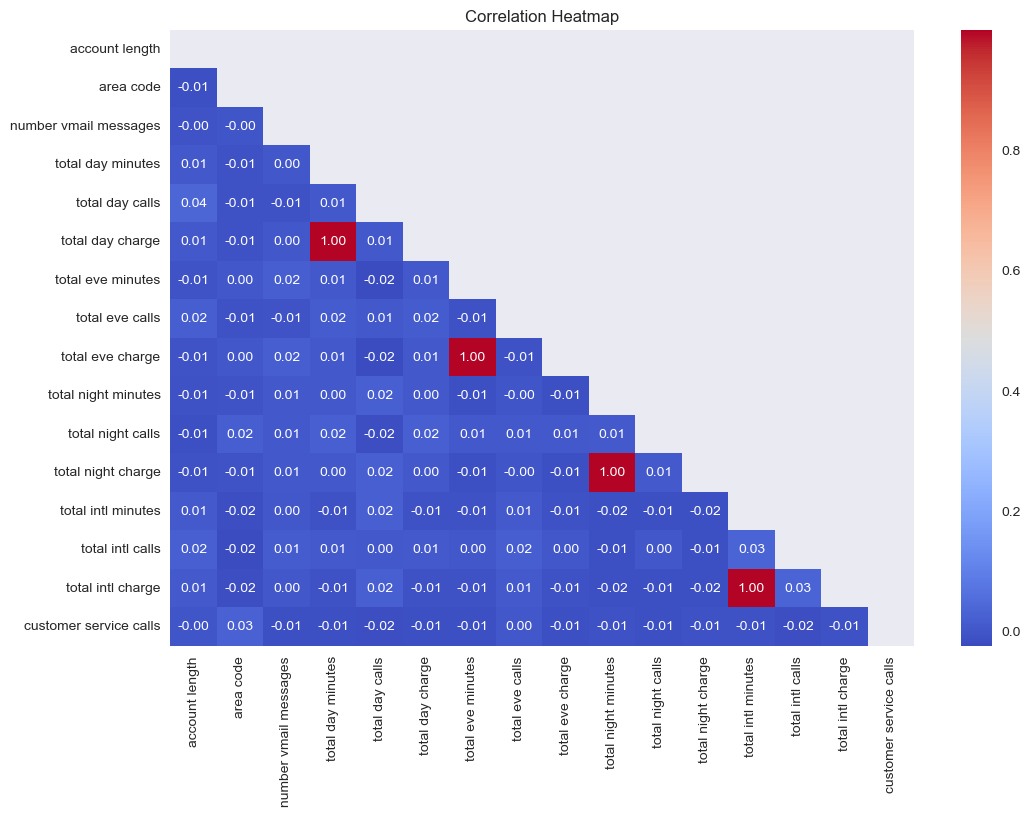

In [186]:
numeric_columns = data.select_dtypes(include=['number'])
# Creating a correlation matrix
correlation_matrix = numeric_columns.corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,)
plt.title('Correlation Heatmap')
plt.show();

Almost all of them almost have either a weak or no correlation with each other, whether positive or negative. However, regardless of the time, we see a perfect positive correlation between minutes spent on calls and charges incurred. This means that there is no independence between these features and in turn it means we wiil not use Logistic Regression or any Naive Bayes model which assume independence of features.

This concludes the Exploratory Data Analysis part and we can now head over to modelling.

## Modelling

In this section we will create different models and choose one which will predict customer churn best using the classification metrics. Since there is class imbalance in the target variable and a false negative would be more catastrophic than false positives, we will use recall as our standard metric. However, before we begin the modelling process, we need to conduct data preprocessing before we create the models.

### Data Preprocessing.

We will begin by doing some feature engineering on our dataset. Since the models only use features which are numerical in nature, we will encode the values in the `international plan` and `voice mail plan` columns. This will be done by creating a function that maps the values. 

In [187]:
# Checking the value counts of the two columns
for column in data[['international plan', 'voice mail plan']]:
    print(f'\n{data[column].value_counts()}')


no     3010
yes     323
Name: international plan, dtype: int64

no     2411
yes     922
Name: voice mail plan, dtype: int64


In [188]:
# Create a mapping function and apply it to the selected columns
def binary_feature(target_value):
    if target_value == 'yes':
        return 1
    else:
        return 0

# Applying the function to the selected columns.
for column in data[['international plan', 'voice mail plan']]:
    data[column] = data[column].apply(binary_feature)
    print(f'\n{data[column].value_counts()}')


0    3010
1     323
Name: international plan, dtype: int64

0    2411
1     922
Name: voice mail plan, dtype: int64


With the feature engineering segment being done we can now head over to the definig of X and y and the splitting of the dataset into training and testing datasets. We will conduct a `70/30` split with a random state of `42` for reproducibility. We will also be dropping the features we had mentioned above in this part.

In [189]:
# Choosing X and y
y = data['churn']
X = data.drop(['churn', 'state', 'area code', 'phone number'], axis=1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will combine the MinMax scaler with the pipelines we will use for modelling. 

However, before we begin any modelling, we will create functions that brings all the the classification metrics.


In [245]:
# Creating the function
# Confusion matrix
def confusion_matrix_metrics(y_true, y_pred, model):
    cf = confusion_matrix(y_true, y_pred)
    labels = model.classes_
    plt.figure(figsize=(8,6))
    sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show();

In [191]:
# Evaluation metrics
def evaluation_metrics(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print('---------------------------------------------------')
    print(f'Precision score for this model is: {precision_score(y_true, y_pred)}')
    print(f'Recall score for this model is: {recall_score(y_true, y_pred)}')
    print(f'Accuracy score for this model is: {accuracy_score(y_true, y_pred)}')
    print(f'F1 score for this model is: {f1_score(y_true, y_pred)}')
    print('---------------------------------------------------')
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    auc_pr = auc(recall, precision)
    print(f'AUC for the precision-recall curve is: {auc_pr}')
    plt.plot(recall, precision, color= 'darkorange', lw=2, label='Precision_Recall_Curve')
    plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision_Recall_Curve')
    plt.legend(loc='lower right')
    plt.show();

In [192]:
# ROC metrics
def roc_metrics(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC for the ROC curve is: {roc_auc}')
    plt.plot(fpr, tpr, color= 'darkorange', lw=2, label='ROC Curve')
    plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show();  

Now that the function is created, we can now head to the modelling part and we will begin with Decision Trees.

### 1. Decision Trees.

We will begin the modelling process with decision trees. We have used decision trees because not only can be used for binary classification but also it does not assume independence of features. We can now create a baseline decision tree model.

In [193]:
# Creating a pipeline for the model
dt1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])
# Fitting the model
dt1.fit(X_train, y_train)
# Predicting the model
y_pred1 = dt1.predict(X_test)

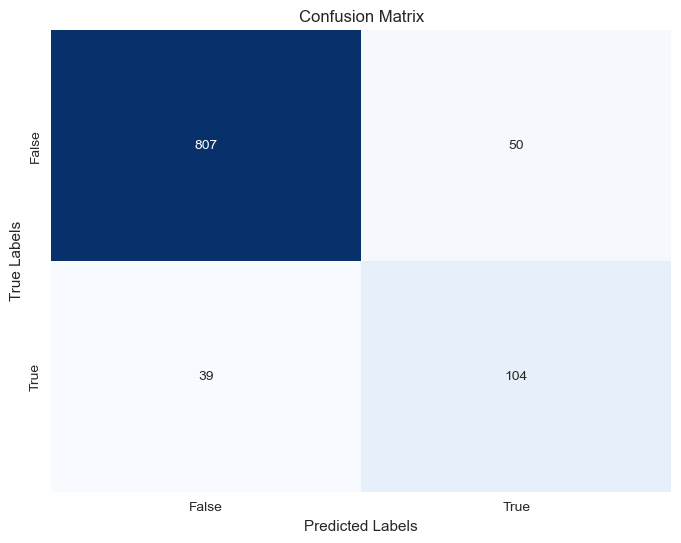

In [246]:
# Evaluating the confusion matrix
confusion_matrix_metrics(y_test, y_pred1, dt1)

              precision    recall  f1-score   support

       False       0.95      0.94      0.95       857
        True       0.68      0.73      0.70       143

    accuracy                           0.91      1000
   macro avg       0.81      0.83      0.82      1000
weighted avg       0.91      0.91      0.91      1000

---------------------------------------------------
Precision score for this model is: 0.6753246753246753
Recall score for this model is: 0.7272727272727273
Accuracy score for this model is: 0.911
F1 score for this model is: 0.7003367003367004
---------------------------------------------------
AUC for the precision-recall curve is: 0.7207987012987013


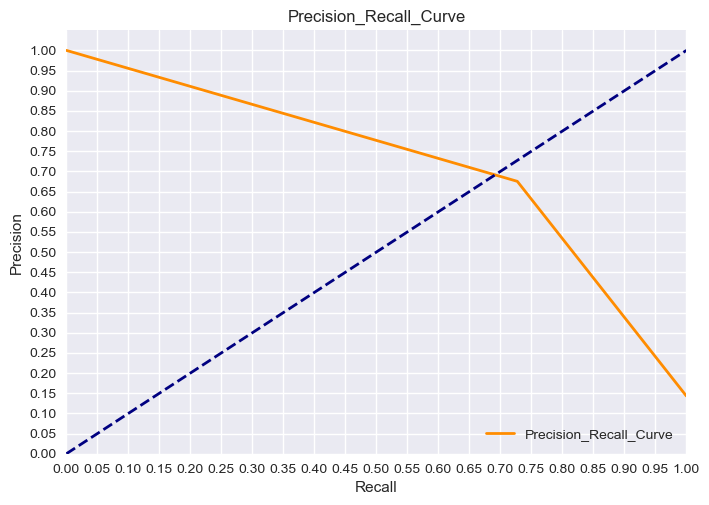

In [195]:
# Evaluating the classification metrics
evaluation_metrics(y_test, y_pred1)

AUC for the ROC curve is: 0.8344648350482656


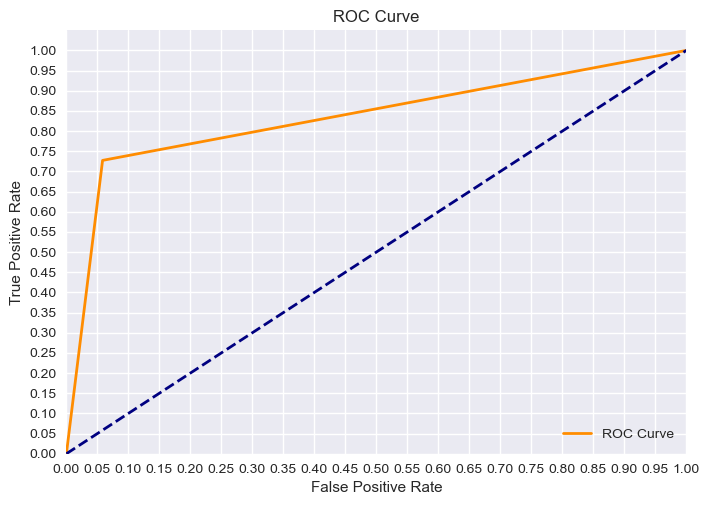

In [196]:
# Evaluating the ROC metrics
roc_metrics(y_test, y_pred1)

With default parameters, we can see that the algorithm has a lot of false negatives and false positives. The evaluation metric values are also seen to be above 0.6, the precision-recall curve AUC is just over 0.72 and the ROC AUC is above 0.83. We can also add some hyperparameters and see if the model will improve.

In [197]:
# Creating the second decision tree
dt2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=3, min_samples_split=6, criterion='entropy'))
])
# Fitting the model
dt2.fit(X_train, y_train)
# Predicting the model
y_pred2 = dt2.predict(X_test)

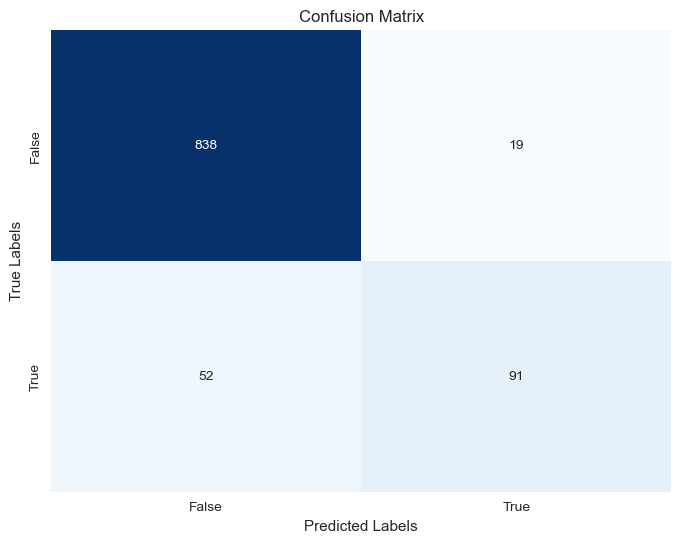

In [247]:
# Evaluating the confusion matrix
confusion_matrix_metrics(y_test, y_pred2, dt2)

              precision    recall  f1-score   support

       False       0.94      0.98      0.96       857
        True       0.83      0.64      0.72       143

    accuracy                           0.93      1000
   macro avg       0.88      0.81      0.84      1000
weighted avg       0.93      0.93      0.93      1000

---------------------------------------------------
Precision score for this model is: 0.8272727272727273
Recall score for this model is: 0.6363636363636364
Accuracy score for this model is: 0.929
F1 score for this model is: 0.7193675889328063
---------------------------------------------------
AUC for the precision-recall curve is: 0.7578181818181818


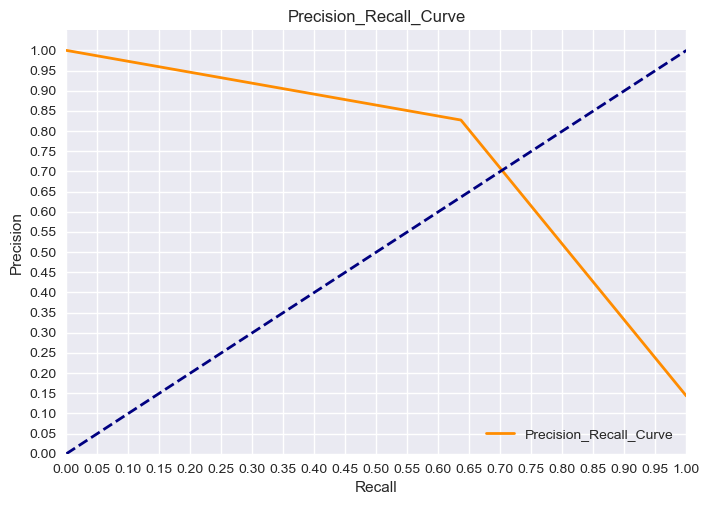

In [199]:
# Evaluating the classification metrics
evaluation_metrics(y_test, y_pred2)

AUC for the ROC curve is: 0.8070966373183408


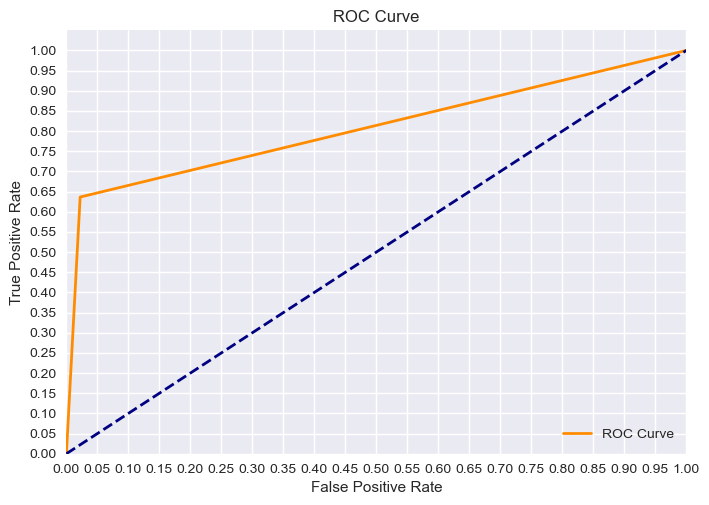

In [200]:
# Evaluating the ROC metrics
roc_metrics(y_test, y_pred2)

We can see that even though we have added hyperparameters to our model, there is a drop in recall and ROC-AUC. There is an increased number of false negatives compared to the baseline. However, there is an improvement in the precision, f1 score and accuracy. We can also try hyperparameter tuning using GridSearchCV and see whether we will get the best decision tree.

In [201]:
# We will use the baseline decision tree model for our GridSearchCV
# Creating the grid parameter
grid1 = {
    'clf__criterion': ['entropy', 'gini'],
    'clf__splitter': ['best', 'random'],
    'clf__max_depth': [None, 2, 5, 10, 20, 50],
    'clf__min_samples_split': [2, 5, 7, 10, 15, 20],
    'clf__min_samples_leaf': [1, 2, 4, 5, 7]
}
# Creating the grid

gridsearch1 = GridSearchCV(estimator=dt1,
                           param_grid=grid1,
                           scoring='accuracy',
                           cv=5)
# Fitting the data to the grid search
gridsearch1.fit(X_train, y_train)

# Getting the best parameters from the grid search
gridsearch1.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 10,
 'clf__min_samples_leaf': 5,
 'clf__min_samples_split': 2,
 'clf__splitter': 'best'}

In [202]:
# Using the hyperparameters gotten from the gridsearch
dt3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=2, splitter='best'))
])
# Fitting the model
dt3.fit(X_train, y_train)
# Predicting the model
y_pred3 = dt3.predict(X_test)

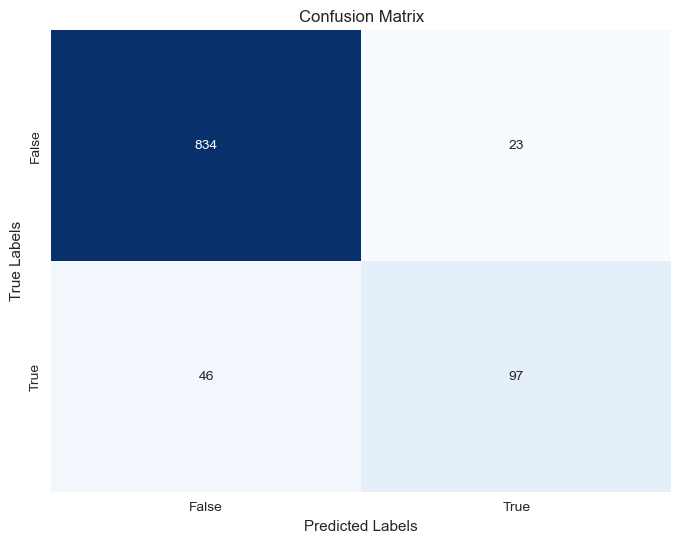

In [248]:
# Confusion metrics 
confusion_matrix_metrics(y_test, y_pred3, dt3)

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       857
        True       0.81      0.68      0.74       143

    accuracy                           0.93      1000
   macro avg       0.88      0.83      0.85      1000
weighted avg       0.93      0.93      0.93      1000

---------------------------------------------------
Precision score for this model is: 0.8083333333333333
Recall score for this model is: 0.6783216783216783
Accuracy score for this model is: 0.931
F1 score for this model is: 0.7376425855513308
---------------------------------------------------
AUC for the precision-recall curve is: 0.7663275058275059


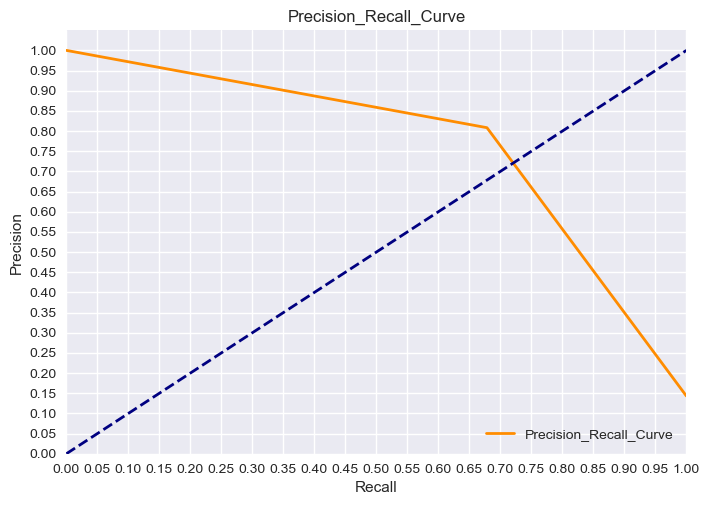

In [204]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred3)

AUC for the ROC curve is: 0.8257419360103141


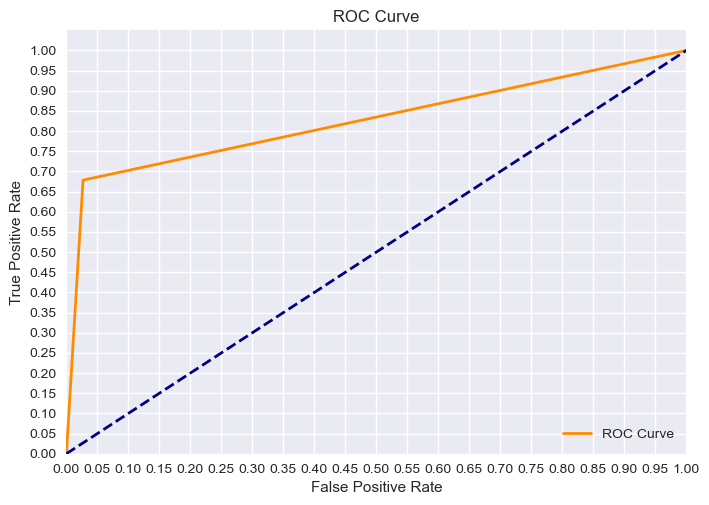

In [205]:
# ROC metrics
roc_metrics(y_test, y_pred3)

As we can see, the model where we have tuned the hyperparameters has improved metrics compared to the previous one. The number of false positives has increased but the false negatives has reduced. Precision is the only metric with a decrease but other metrics, including ROC-AUC has improved. Even if the recall of the baseline model is better than that of this model, we will opt with this model on the basis that it has better metrics compared to the baseline.

We can now go to the next model, K-Nearest Neighbors.

### 2. K-Nearest Neighbors(KNN)

The second algorithm we will use is the KNN algorithm. The fact that the model does not assume independence of variables is the reason we have opted for the algorithm.

We will now create a baseline KNN model.

In [206]:
# Creating a pipeline for the model
knn1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier())
])
# Fitting the model
knn1.fit(X_train, y_train)
# Predicting the model
y_pred4 = knn1.predict(X_test)

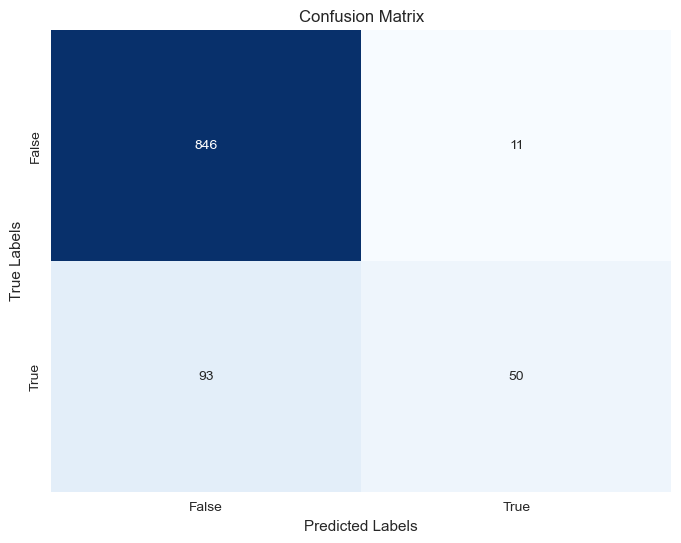

In [249]:
# Confusion metrics 
confusion_matrix_metrics(y_test, y_pred4, knn1)

              precision    recall  f1-score   support

       False       0.90      0.99      0.94       857
        True       0.82      0.35      0.49       143

    accuracy                           0.90      1000
   macro avg       0.86      0.67      0.72      1000
weighted avg       0.89      0.90      0.88      1000

---------------------------------------------------
Precision score for this model is: 0.819672131147541
Recall score for this model is: 0.34965034965034963
Accuracy score for this model is: 0.896
F1 score for this model is: 0.49019607843137253
---------------------------------------------------
AUC for the precision-recall curve is: 0.6311612403989453


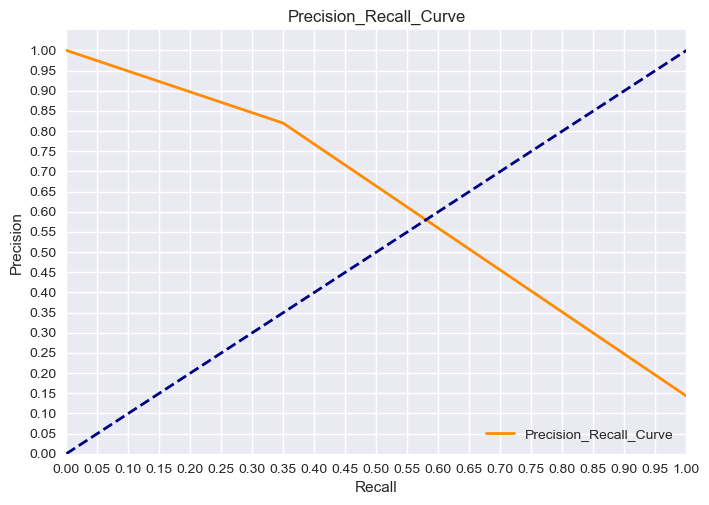

In [208]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred4)

AUC for the ROC curve is: 0.6684074385357932


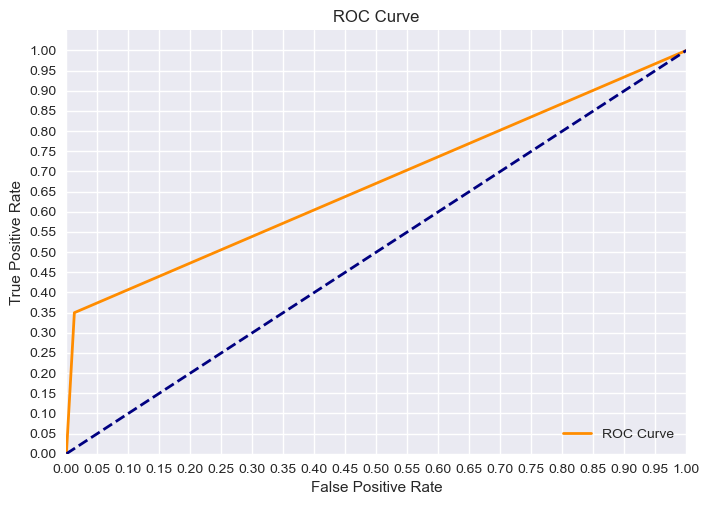

In [209]:
# ROC metrics
roc_metrics(y_test, y_pred4)

We can see that the model performs pooly than the decision tree baseline model. The only improvement can be seen in the precision score. The false negatives are more than the false positives which is not good. We can add a few hyperparameters for our second model.

In [210]:
knn2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=7, algorithm='ball_tree', weights='distance'))
])
# Fitting the model
knn2.fit(X_train, y_train)
# Predicting the model
y_pred5 = knn2.predict(X_test)

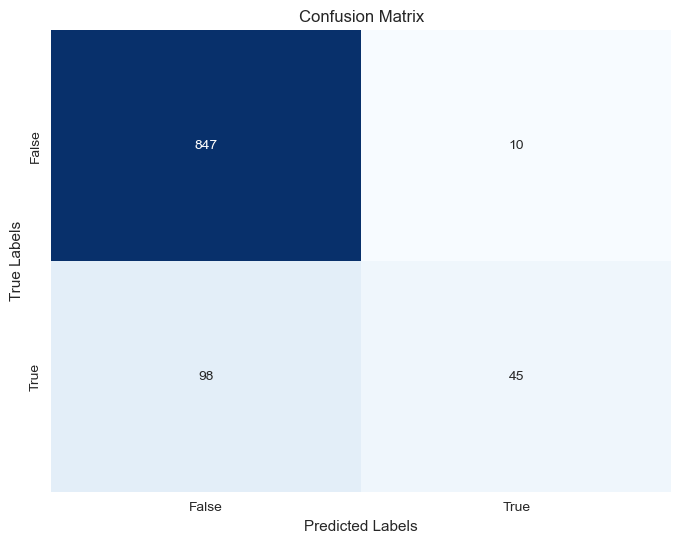

In [250]:
# Confusion metrics 
confusion_matrix_metrics(y_test, y_pred5, knn2)

              precision    recall  f1-score   support

       False       0.90      0.99      0.94       857
        True       0.82      0.31      0.45       143

    accuracy                           0.89      1000
   macro avg       0.86      0.65      0.70      1000
weighted avg       0.89      0.89      0.87      1000

---------------------------------------------------
Precision score for this model is: 0.8181818181818182
Recall score for this model is: 0.3146853146853147
Accuracy score for this model is: 0.892
F1 score for this model is: 0.4545454545454546
---------------------------------------------------
AUC for the precision-recall curve is: 0.6154335664335664


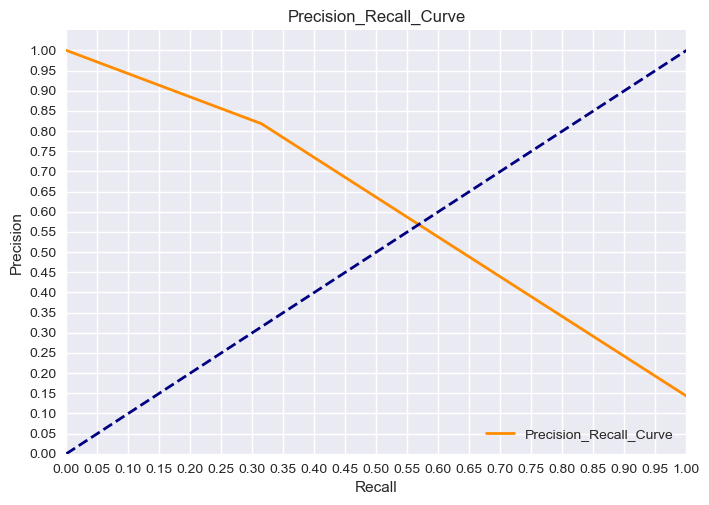

In [212]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred5)

AUC for the ROC curve is: 0.6515083516250377


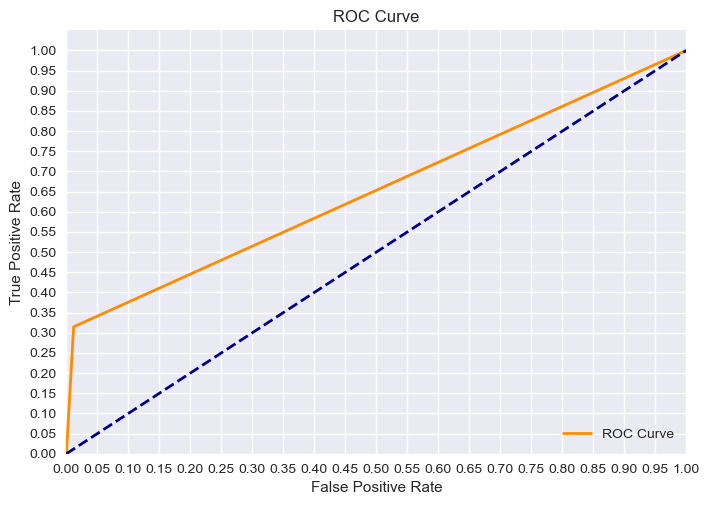

In [213]:
# ROC metrics
roc_metrics(y_test, y_pred5)

From the confusion matrix, the second KNN model performs worse than the baseline. The number of false negatives has increased and the number of true negatives has decreased. The evaluation mertics and the ROC-AUC have also decreased but it is a small difference. We will then use GridSearchCV to find the best hyperparameters to use.

In [214]:
# We will use the baseline KNN model for our GridSearchCV
# Creating the grid parameter
grid2 = {
    'clf__n_neighbors': [1, 2, 3, 5, 7, 10, 13],
    'clf__weights': ['uniform', 'distance'],
    'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'clf__p': [1, 2, 5, 7, 9]
}
# Creating the grid

gridsearch2 = GridSearchCV(estimator=knn1,
                           param_grid=grid2,
                           scoring='accuracy',
                           cv=5)
# Fitting the data to the grid search
gridsearch2.fit(X_train, y_train)

# Getting the best parameters from the grid search
gridsearch2.best_params_

{'clf__algorithm': 'auto',
 'clf__n_neighbors': 10,
 'clf__p': 1,
 'clf__weights': 'distance'}

In [215]:
# Using the hyperparameters gotten from the gridsearch
knn3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=10, algorithm='auto', weights='distance', p=1))
])
# Fitting the model
knn3.fit(X_train, y_train)
# Predicting the model
y_pred6 = knn3.predict(X_test)

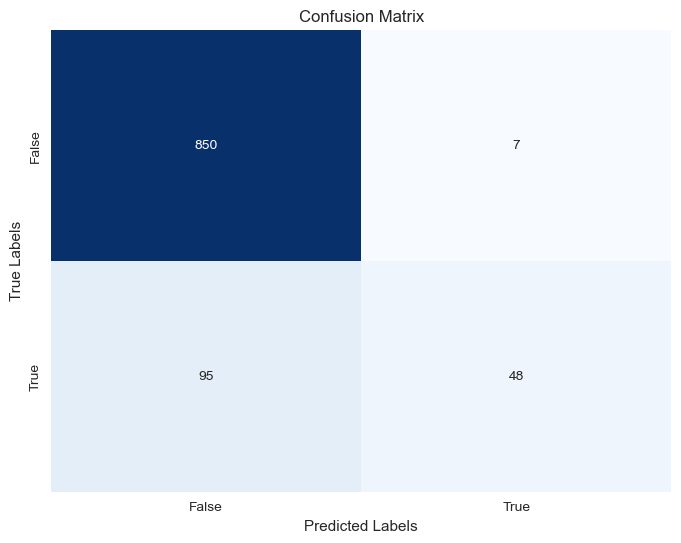

In [251]:
# Confusion metrics 
confusion_matrix_metrics(y_test, y_pred6, knn3)

              precision    recall  f1-score   support

       False       0.90      0.99      0.94       857
        True       0.87      0.34      0.48       143

    accuracy                           0.90      1000
   macro avg       0.89      0.66      0.71      1000
weighted avg       0.90      0.90      0.88      1000

---------------------------------------------------
Precision score for this model is: 0.8727272727272727
Recall score for this model is: 0.3356643356643357
Accuracy score for this model is: 0.898
F1 score for this model is: 0.48484848484848486
---------------------------------------------------
AUC for the precision-recall curve is: 0.6516958041958041


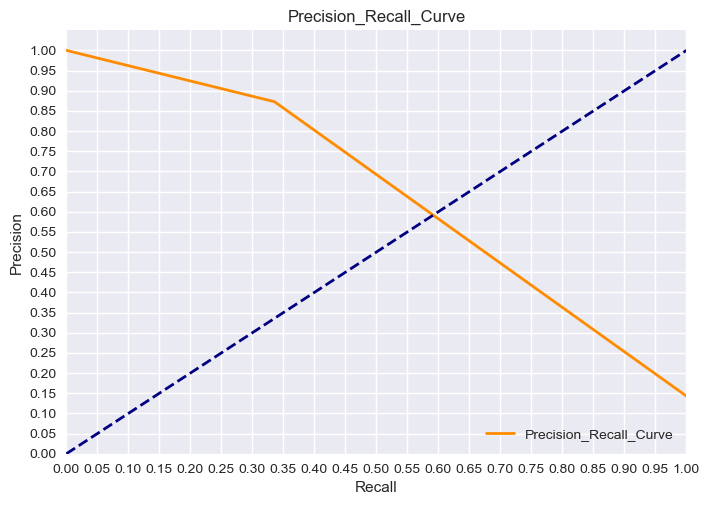

In [217]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred6)

AUC for the ROC curve is: 0.6637481538298341


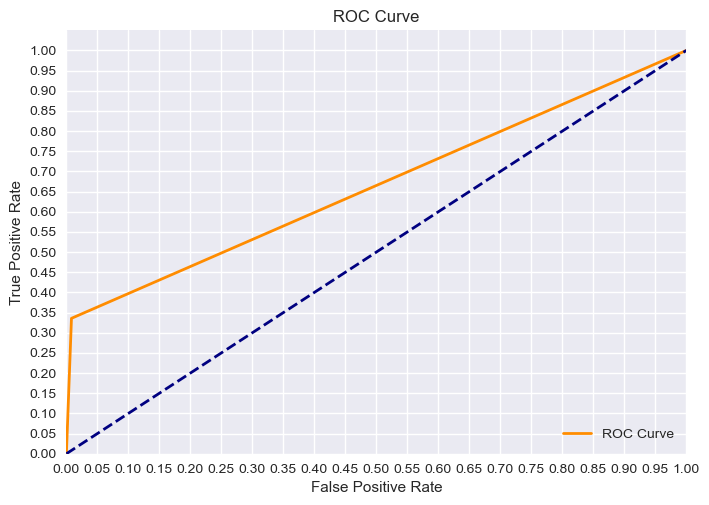

In [218]:
# ROC metrics
roc_metrics(y_test, y_pred6)

We can see that the metrics for the second model and the final knn model have improved a bit. The false negatives has dropped by 3 and the true negatives has increased by 3. Even with hyperparameter tuning we can see that KNN is not a suitable model to predict customer churn. 

We will now go to the next model, Discriminant Analysis.

### 3. Discriminant Analysis.

Discriminant Analysis is a supervised learning algorithm that aims to find the linear combinations of features that best discriminate between two or more classes. This algorithm can be branched into two, Linear Discriminant Analysis(LDA) and Quadratic Discriminant Analysis(QDA). We will use the latter one since it assumes that each class has its own covariance matrix making it more flexible in capturing theshape of decision boundaries and it assumes the data within each class follows a multivariate normal distribution. It also does not assume independence of features.

We can now create the QDA baseline model. 

In [219]:
# Creating a pipeline for the model
qda1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', QuadraticDiscriminantAnalysis())
])
# Fitting the model
qda1.fit(X_train, y_train)
# Predicting the model
y_pred7 = qda1.predict(X_test)

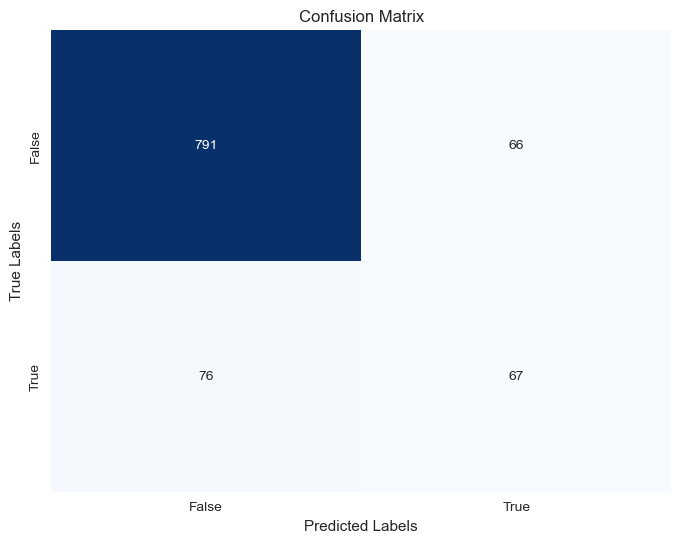

In [252]:
# Confusion metrics
confusion_matrix_metrics(y_test, y_pred7, qda1)

              precision    recall  f1-score   support

       False       0.91      0.92      0.92       857
        True       0.50      0.47      0.49       143

    accuracy                           0.86      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.85      0.86      0.86      1000

---------------------------------------------------
Precision score for this model is: 0.5037593984962406
Recall score for this model is: 0.46853146853146854
Accuracy score for this model is: 0.858
F1 score for this model is: 0.4855072463768116
---------------------------------------------------
AUC for the precision-recall curve is: 0.5241454335138546


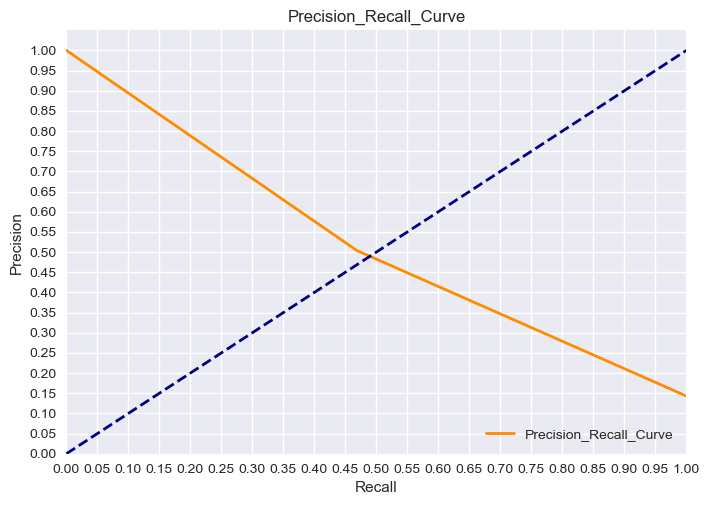

In [221]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred7)

AUC for the ROC curve is: 0.6957593165294449


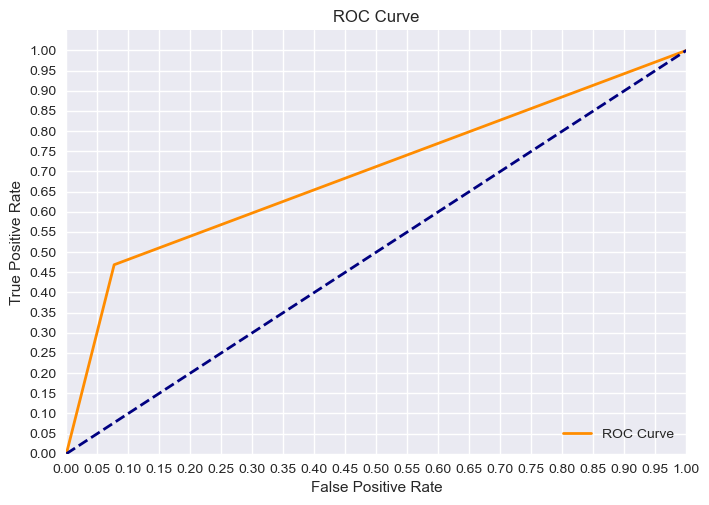

In [222]:
# ROC metrics
roc_metrics(y_test, y_pred7)

Compared to KNN baseline model, the QDA baseline model has better metrics but they are lower than the decision tree baseline. The only issue is that the false negatives are more than the true negatives but with a smaller difference compared to KNN. We can add the regularization hyperparameter and see if the metrics will improve.

In [223]:
# Creating a pipeline for the model
qda2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', QuadraticDiscriminantAnalysis(reg_param=0.1))
])
# Fitting the model
qda2.fit(X_train, y_train)
# Predicting the model
y_pred8 = qda2.predict(X_test)

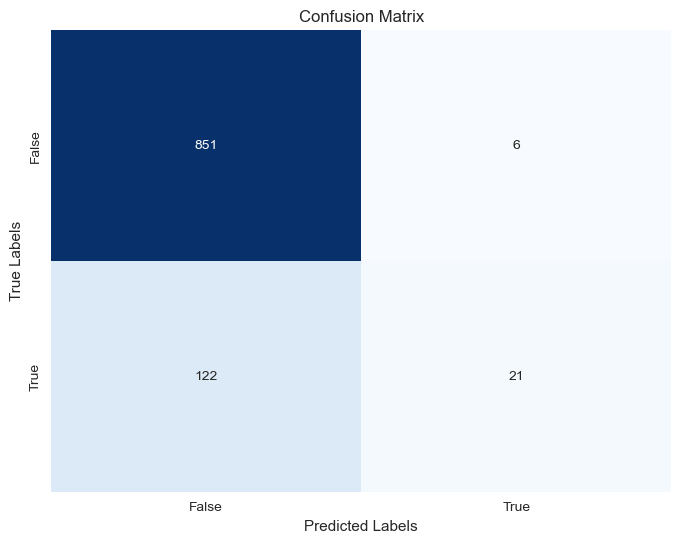

In [253]:
# Confusion metrics
confusion_matrix_metrics(y_test, y_pred8, qda2)

              precision    recall  f1-score   support

       False       0.87      0.99      0.93       857
        True       0.78      0.15      0.25       143

    accuracy                           0.87      1000
   macro avg       0.83      0.57      0.59      1000
weighted avg       0.86      0.87      0.83      1000

---------------------------------------------------
Precision score for this model is: 0.7777777777777778
Recall score for this model is: 0.14685314685314685
Accuracy score for this model is: 0.872
F1 score for this model is: 0.24705882352941178
---------------------------------------------------
AUC for the precision-recall curve is: 0.5233154623154623


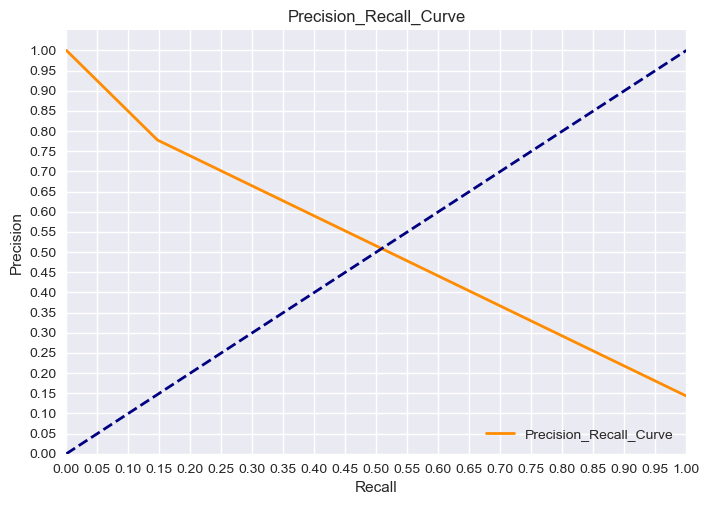

In [225]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred8)

AUC for the ROC curve is: 0.5699259899960016


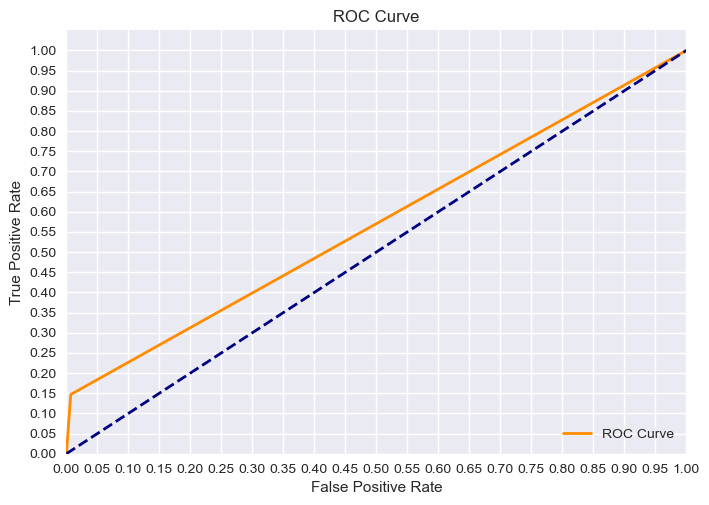

In [226]:
# ROC metrics
roc_metrics(y_test, y_pred8)

After adding the hyperparameter to the model, the model has performed worse than the baseline model. All the metrics have decreased significantly and the number of false negatives has increased. We will now use GridSearchCV to find the best regularization hyperparameter for our model.

In [227]:
# We will use the baseline QDA model for our GridSearchCV
# Creating the grid parameter
grid3 = {
    'clf__reg_param': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
# Creating the grid

gridsearch3 = GridSearchCV(estimator=qda1,
                           param_grid=grid3,
                           scoring='accuracy',
                           cv=5)
# Fitting the data to the grid search
gridsearch3.fit(X_train, y_train)

# Getting the best parameters from the grid search
gridsearch3.best_params_

{'clf__reg_param': 0}

In [228]:
# Using the hyperparameters gotten from the gridsearch
qda3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', QuadraticDiscriminantAnalysis(reg_param=0))
])
# Fitting the model
qda3.fit(X_train, y_train)
# Predicting the model
y_pred9 = qda3.predict(X_test)

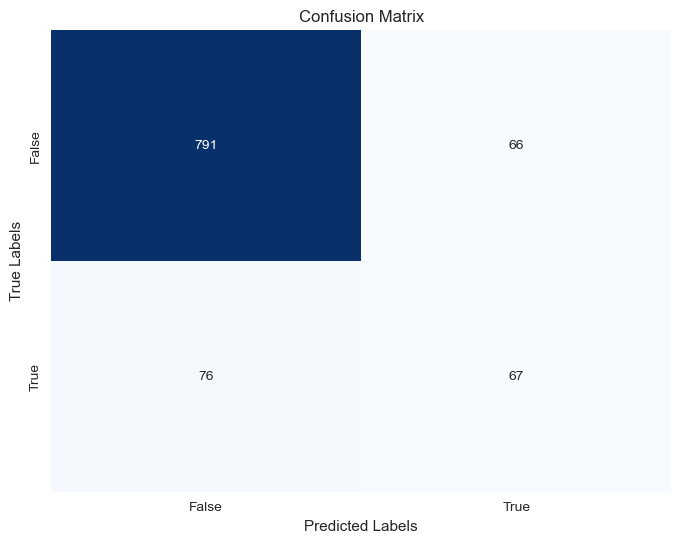

In [254]:
# Confusion metrics
confusion_matrix_metrics(y_test, y_pred9, qda3)

              precision    recall  f1-score   support

       False       0.91      0.92      0.92       857
        True       0.50      0.47      0.49       143

    accuracy                           0.86      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.85      0.86      0.86      1000

---------------------------------------------------
Precision score for this model is: 0.5037593984962406
Recall score for this model is: 0.46853146853146854
Accuracy score for this model is: 0.858
F1 score for this model is: 0.4855072463768116
---------------------------------------------------
AUC for the precision-recall curve is: 0.5241454335138546


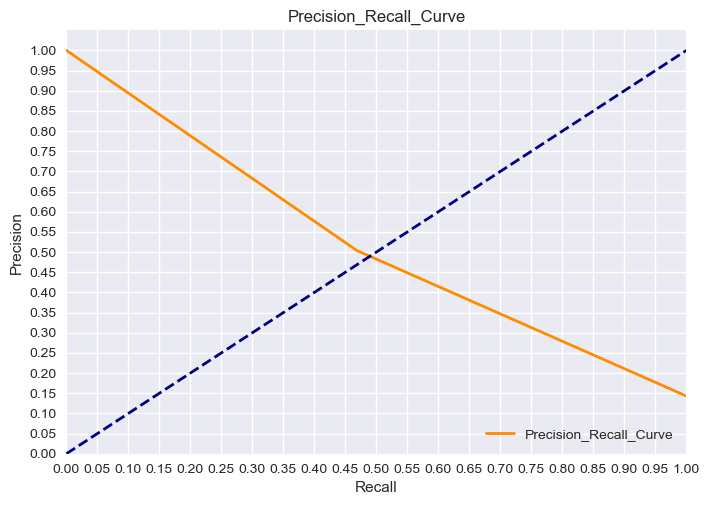

In [230]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred9)

AUC for the ROC curve is: 0.6957593165294449


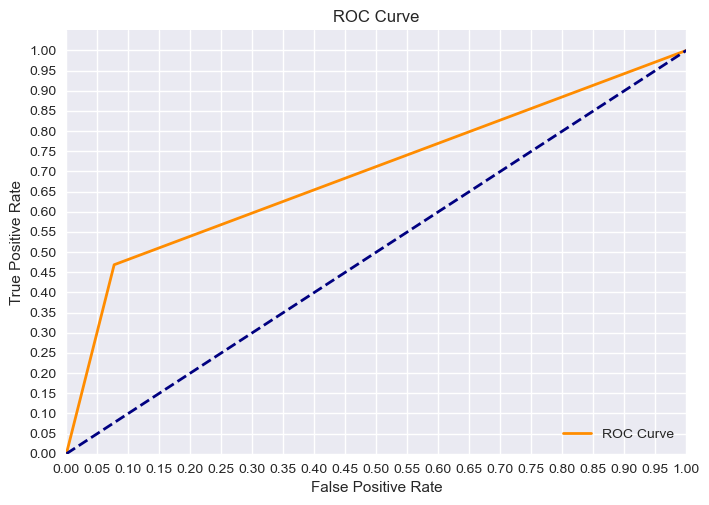

In [231]:
# ROC metrics
roc_metrics(y_test, y_pred9)

It seems that the baseline model was the best QDA model we could use. It is worse than the decision tree model but better than the KNN model. However, we cannot use it for predicting customer churn.

We will now go to the next model, Random Forests.

### 4. Random Forests.

A Random Forest is the only bagging algorithm we will use in this project. Since it involves constructing a multitude of decision trees, it means it also doesn't assume independence of features and that's why we are using it. 

We can now create the baseline random forest model.

In [232]:
# Creating a pipeline for the model
rf1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])
# Fitting the model
rf1.fit(X_train, y_train)
# Predicting the model
y_pred10 = rf1.predict(X_test)

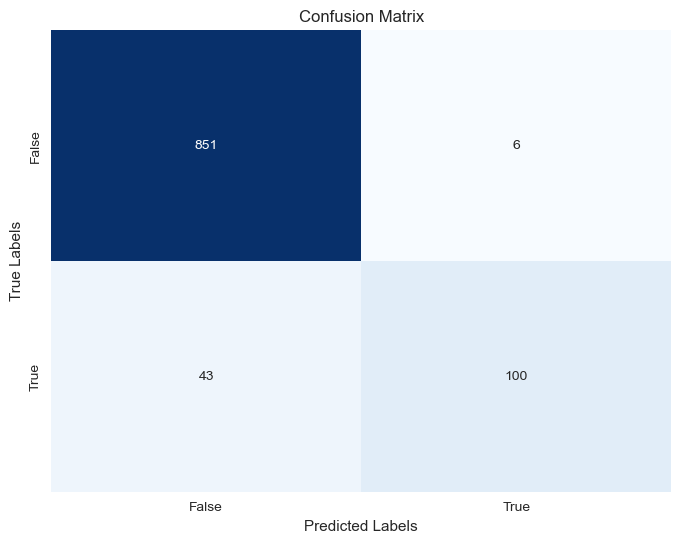

In [255]:
# Confusion metrics
confusion_matrix_metrics(y_test, y_pred10, rf1)

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       857
        True       0.94      0.70      0.80       143

    accuracy                           0.95      1000
   macro avg       0.95      0.85      0.89      1000
weighted avg       0.95      0.95      0.95      1000

---------------------------------------------------
Precision score for this model is: 0.9433962264150944
Recall score for this model is: 0.6993006993006993
Accuracy score for this model is: 0.951
F1 score for this model is: 0.8032128514056224
---------------------------------------------------
AUC for the precision-recall curve is: 0.8428484628578968


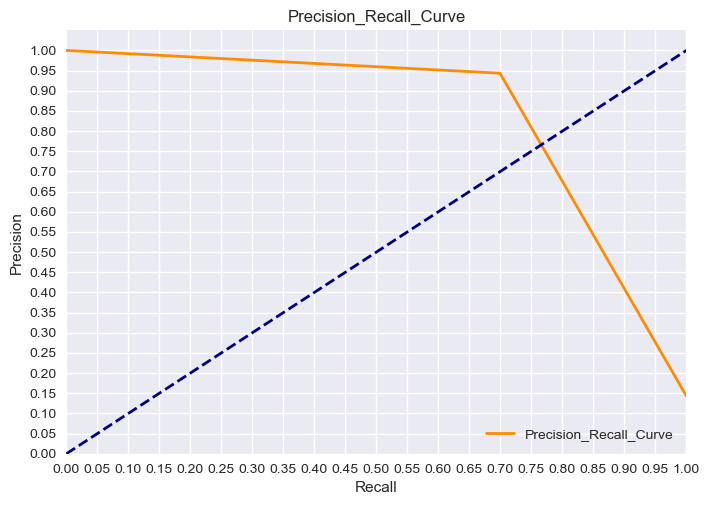

In [234]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred10)

AUC for the ROC curve is: 0.8461497662197779


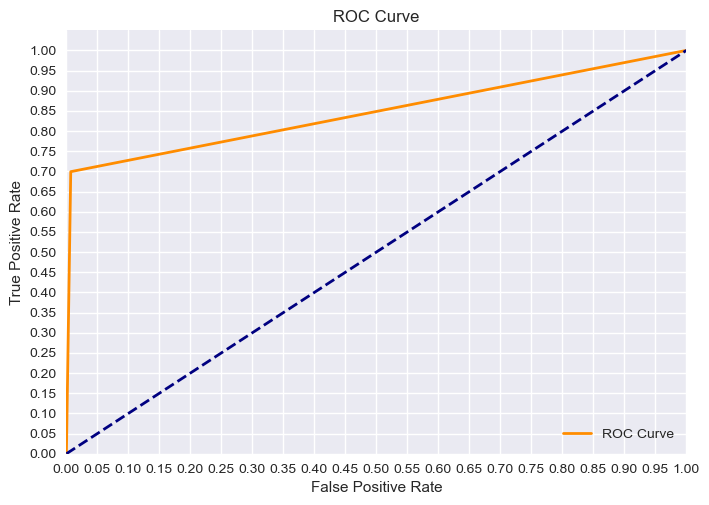

In [235]:
# ROC metrics
roc_metrics(y_test, y_pred10)

We can see that the algorithm has better baseline metrics than the other baseline models. The false negatives is even less than the true negatives. We can now add some hyperparameters and see if it will improve the model.

In [236]:
rf2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42, criterion='entropy', max_depth=5, min_samples_split=5, min_samples_leaf=2))
])
# Fitting the model
rf2.fit(X_train, y_train)
# Predicting the model
y_pred11 = rf2.predict(X_test)

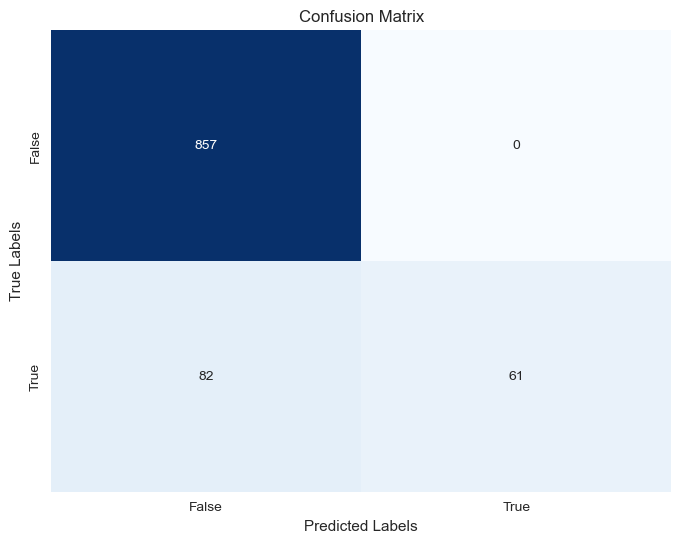

In [256]:
# Confusion metrics
confusion_matrix_metrics(y_test, y_pred11, rf2)

              precision    recall  f1-score   support

       False       0.91      1.00      0.95       857
        True       1.00      0.43      0.60       143

    accuracy                           0.92      1000
   macro avg       0.96      0.71      0.78      1000
weighted avg       0.93      0.92      0.90      1000

---------------------------------------------------
Precision score for this model is: 1.0
Recall score for this model is: 0.42657342657342656
Accuracy score for this model is: 0.918
F1 score for this model is: 0.5980392156862745
---------------------------------------------------
AUC for the precision-recall curve is: 0.7542867132867133


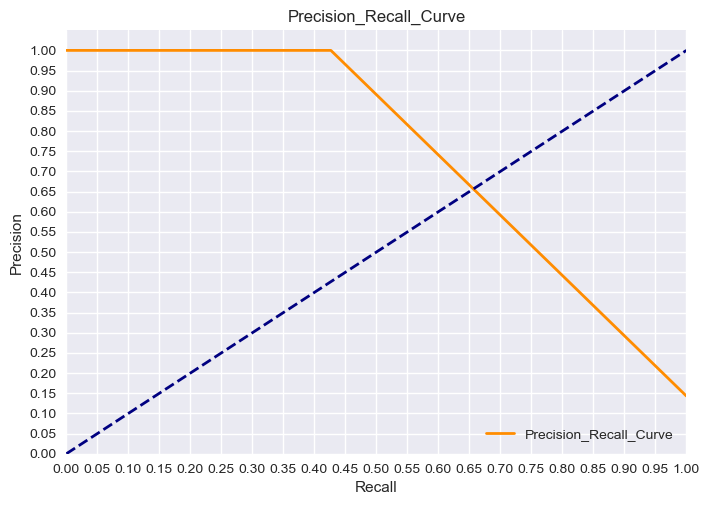

In [238]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred11)

AUC for the ROC curve is: 0.7132867132867133


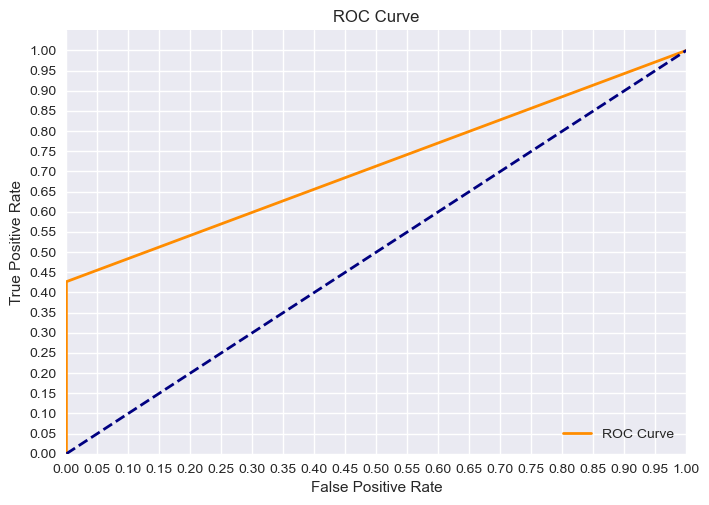

In [239]:
# ROC metrics
roc_metrics(y_test, y_pred11)

Using those hyperparameters, we can see that there is a significant drop in the metrics. Even though the model has managed to have no false positives, the false negatives has become more than the true negatives. We will now use a GridSearchCV to find the best hyperparameters to use for the Random Forest model. 

In [240]:
# We will use the baseline random forest model for our GridSearchCV
# Creating the grid parameter
grid4 = {
    'clf__criterion': ['entropy', 'gini'],
    'clf__max_depth': [None, 2, 5, 10, 20, 50],
    'clf__min_samples_split': [2, 5, 7, 10, 15, 20],
    'clf__min_samples_leaf': [1, 2, 4, 5, 7], 
    'clf__max_features': ['auto', 'sqrt', 'log2']
}
# Creating the grid

gridsearch4 = GridSearchCV(estimator=rf1,
                           param_grid=grid4,
                           scoring='accuracy',
                           cv=5)
# Fitting the data to the grid search
gridsearch4.fit(X_train, y_train)

# Getting the best parameters from the grid search
gridsearch4.best_params_

{'clf__criterion': 'entropy',
 'clf__max_depth': 20,
 'clf__max_features': 'auto',
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 5}

In [241]:
# Using the hyperparameters gotten from the gridsearch
rf3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42, criterion='entropy', max_depth=20, max_features='auto', min_samples_leaf=1, min_samples_split=5))
])
# Fitting the model
rf3.fit(X_train, y_train)
# Predicting the model
y_pred12 = rf3.predict(X_test)

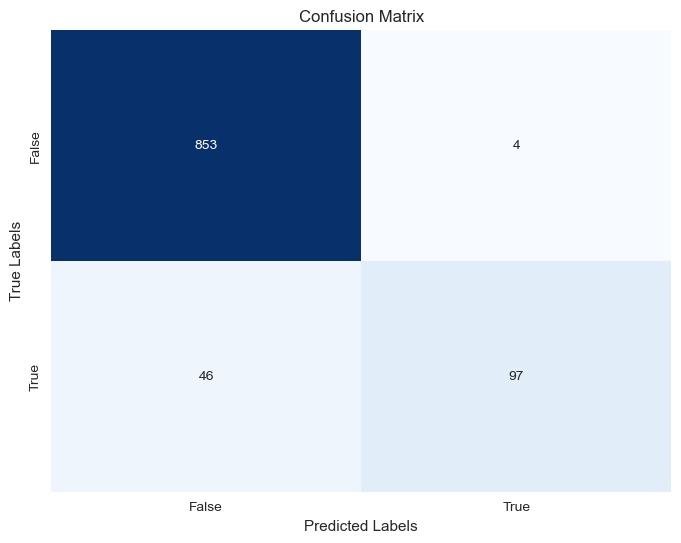

In [257]:
# Confusion metrics
confusion_matrix_metrics(y_test, y_pred12, rf3)

              precision    recall  f1-score   support

       False       0.95      1.00      0.97       857
        True       0.96      0.68      0.80       143

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000

---------------------------------------------------
Precision score for this model is: 0.9603960396039604
Recall score for this model is: 0.6783216783216783
Accuracy score for this model is: 0.95
F1 score for this model is: 0.7950819672131149
---------------------------------------------------
AUC for the precision-recall curve is: 0.8423588589628193


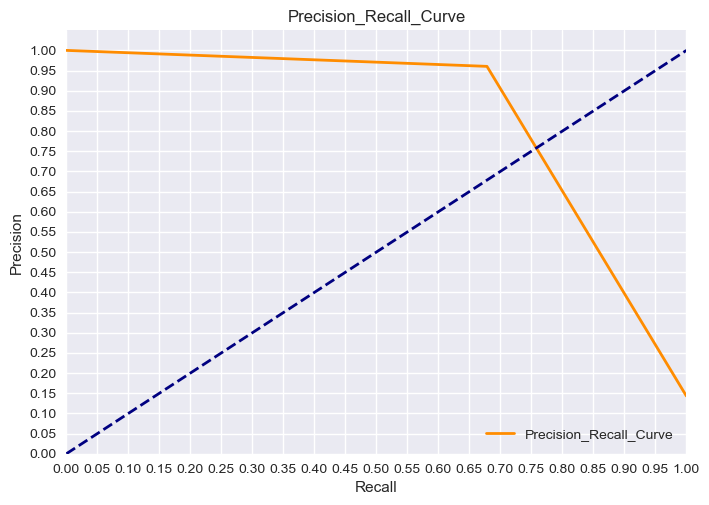

In [243]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred12)

AUC for the ROC curve is: 0.8368271168737913


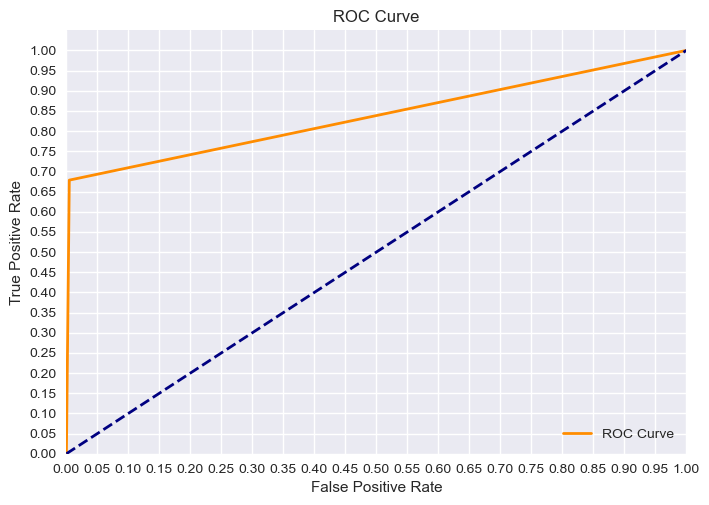

In [244]:
# ROC metrics
roc_metrics(y_test, y_pred12)

We can see that the metrics for this model have improved. However, the model is not as good as the baseline model which has given better results than the rest combined. We will try to create a final model and see if it will mitigate this issue.

We can now go to the final algorithm, XGBoost.

### 5. XGBoost.

XGBoost is the only boosting algorithm we will use. We have opted for it since it is powerful for regression and classification tasks.

We can now create our first model.



In [258]:
# Creating a pipeline for the model
xgb1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', XGBClassifier(random_state=42))
])
# Fitting the model
xgb1.fit(X_train, y_train)
# Predicting the model
y_pred13 = xgb1.predict(X_test)

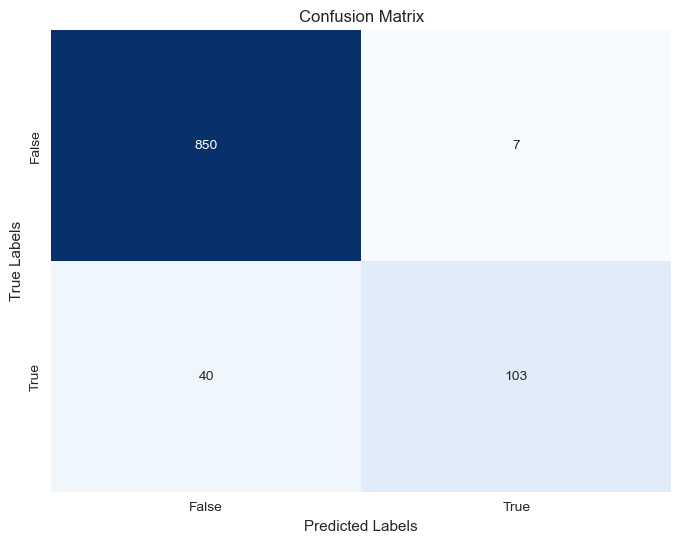

In [260]:
# Confusion metrics
confusion_matrix_metrics(y_test, y_pred13, xgb1)

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       857
        True       0.94      0.72      0.81       143

    accuracy                           0.95      1000
   macro avg       0.95      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000

---------------------------------------------------
Precision score for this model is: 0.9363636363636364
Recall score for this model is: 0.7202797202797203
Accuracy score for this model is: 0.953
F1 score for this model is: 0.8142292490118578
---------------------------------------------------
AUC for the precision-recall curve is: 0.8483216783216785


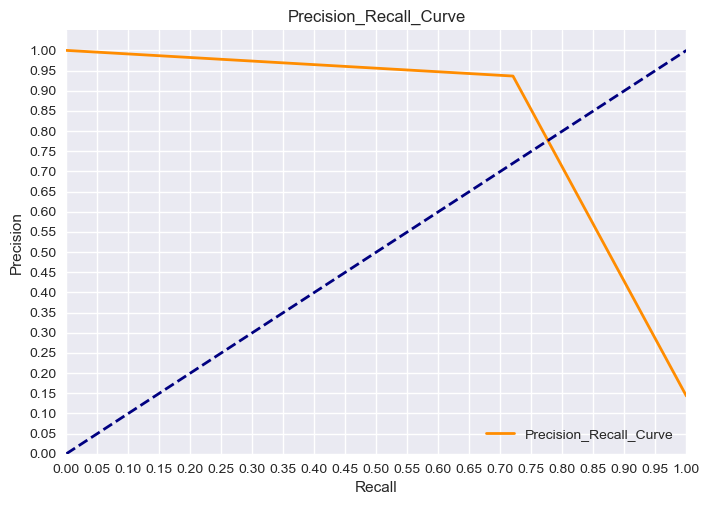

In [261]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred13)

AUC for the ROC curve is: 0.8560558461375265


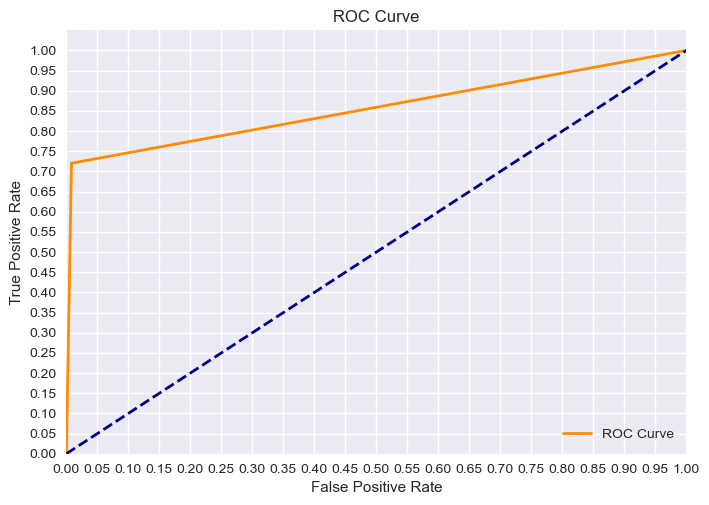

In [262]:
# ROC metrics
roc_metrics(y_test, y_pred13)

From the metrics, we can see that this baseline model performs significantly better than all the models combined.
Even the recall score has improved. We can create a second model and see if we can improve on the baseline model. This involves adding some hyperparameters to the model.

In [264]:
# Creating a pipeline for the model
xgb2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', XGBClassifier(random_state=42, learning_rate=0.2, n_estimators=50, max_depth=5))
])
# Fitting the model
xgb2.fit(X_train, y_train)
# Predicting the model
y_pred14 = xgb2.predict(X_test)

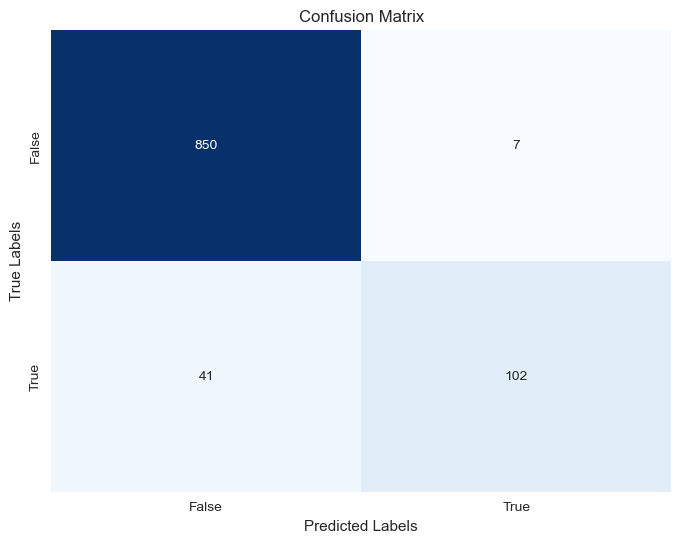

In [267]:
# Confusion metrics
confusion_matrix_metrics(y_test, y_pred14, xgb2)

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       857
        True       0.94      0.71      0.81       143

    accuracy                           0.95      1000
   macro avg       0.94      0.85      0.89      1000
weighted avg       0.95      0.95      0.95      1000

---------------------------------------------------
Precision score for this model is: 0.9357798165137615
Recall score for this model is: 0.7132867132867133
Accuracy score for this model is: 0.952
F1 score for this model is: 0.8095238095238095
---------------------------------------------------
AUC for the precision-recall curve is: 0.8450332649002374


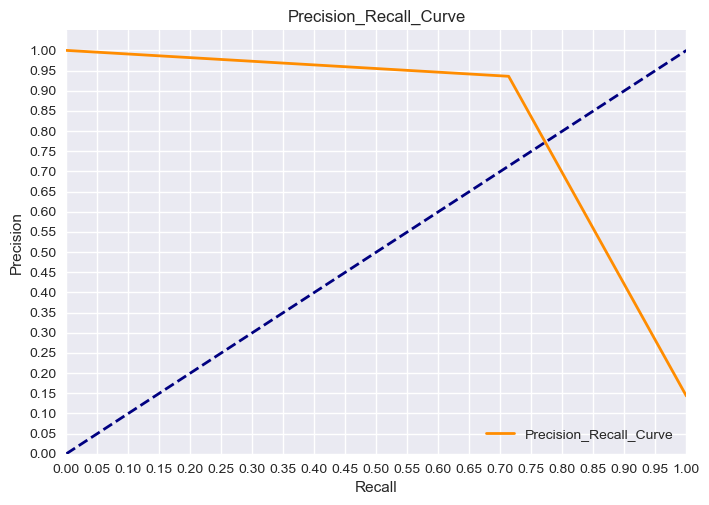

In [268]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred14)

AUC for the ROC curve is: 0.852559342641023


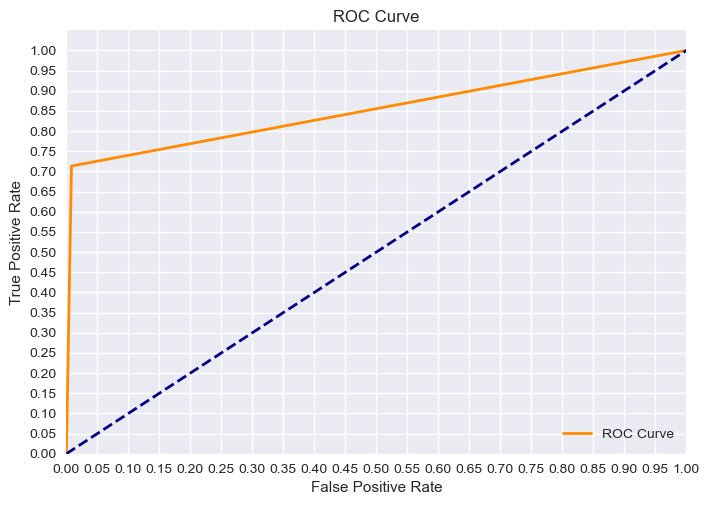

In [270]:
# ROC metrics
roc_metrics(y_test, y_pred14)

We can see that the model's metrics has dropped a little bit when we add the hyperparameters. We can perform a GridSearchCV to find the hyperparameters that may bring the best model metrics.

In [282]:
# We will use the baseline XGBoost model for our GridSearchCV
# Creating the grid parameter
grid5 = {
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.4, 0.5],
    'clf__n_estimators': [10, 20, 30, 50, 100],
    'clf__max_depth': [3, 4, 5, 7, 10],
    'clf__subsample': [0.8, 0.9, 1, 1.5, 2], 
}

# Creating the grid

gridsearch5 = GridSearchCV(estimator=xgb1,
                           param_grid=grid5,
                           scoring='accuracy',
                           cv=5)
# Fitting the data to the grid search
gridsearch5.fit(X_train, y_train)

# Getting the best parameters from the grid search
gridsearch5.best_params_

{'clf__learning_rate': 0.1,
 'clf__max_depth': 10,
 'clf__n_estimators': 100,
 'clf__subsample': 0.9}

In [283]:
xgb3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=10, subsample=0.9))
])
# Fitting the model
xgb3.fit(X_train, y_train)
# Predicting the model
y_pred15 = xgb3.predict(X_test)

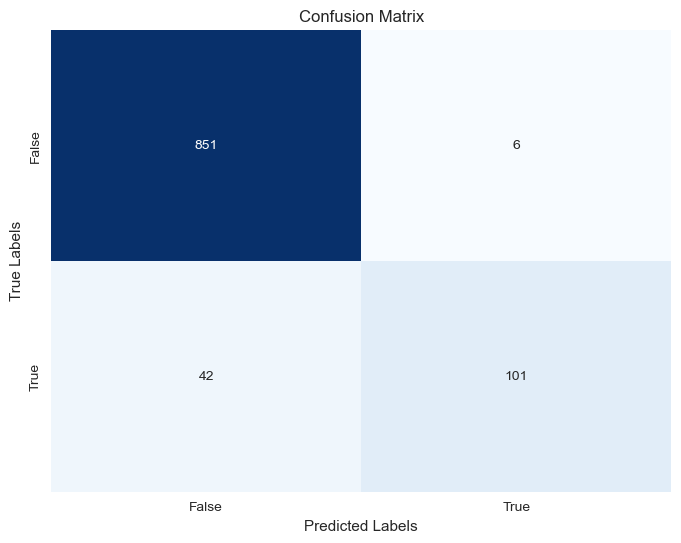

In [284]:
# Confusion metrics
confusion_matrix_metrics(y_test, y_pred15, xgb3)

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       857
        True       0.94      0.71      0.81       143

    accuracy                           0.95      1000
   macro avg       0.95      0.85      0.89      1000
weighted avg       0.95      0.95      0.95      1000

---------------------------------------------------
Precision score for this model is: 0.9439252336448598
Recall score for this model is: 0.7062937062937062
Accuracy score for this model is: 0.952
F1 score for this model is: 0.8079999999999999
---------------------------------------------------
AUC for the precision-recall curve is: 0.846109469969283


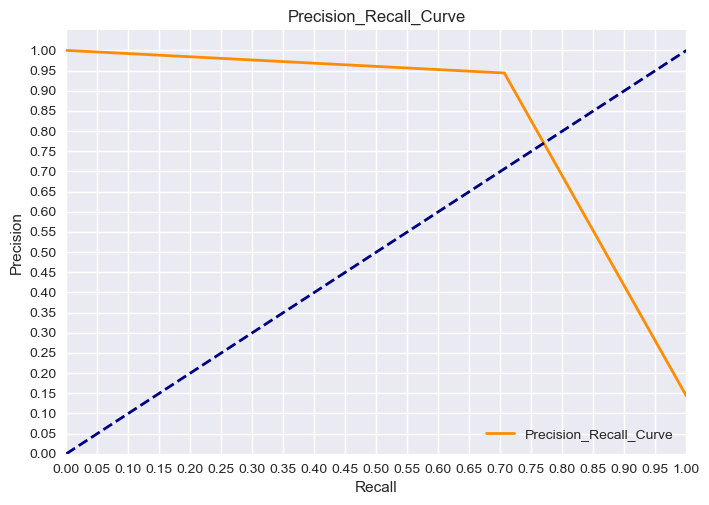

In [285]:
# Evaluation metrics
evaluation_metrics(y_test, y_pred15)

AUC for the ROC curve is: 0.8496462697162813


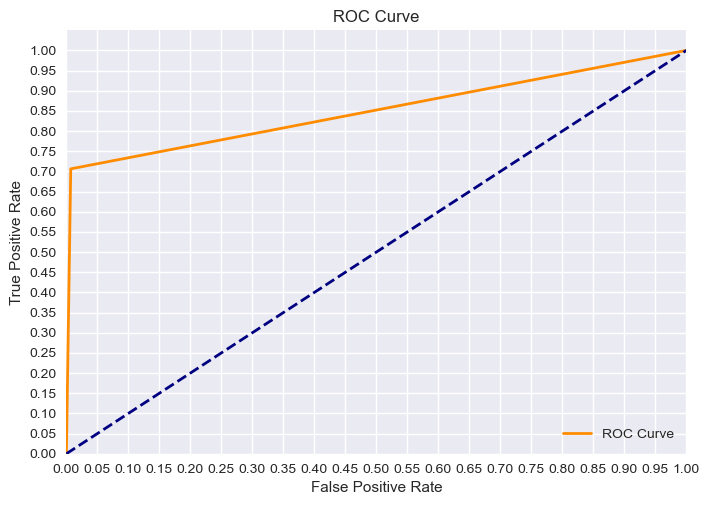

In [286]:
# ROC metrics
roc_metrics(y_test, y_pred15)

Even with hyperparameter tuning, we can see that the model performs a little bit poorly than before. This means that the baseline model has the best metrics compared to the other two and hence we will use it in the final model evaluation which is the next step.

### Model evaluation.

When we began modelling we stated that we will use the recall score as the determining metric. This is because the impact of false negatives on the model would be worse on determining customer churn than false positives in that the company would incur losses if it did not predict a whether a customer would soon stop using SyriaTel's services or not. With this, we can now print out the models' recall scores.

In [290]:
# Getting recall scores for each model.
print('--------------------------RECALL SCORES------------------------------\n')
print(f'Recall score for Decision Tree: {round(recall_score(y_test, y_pred3), 2)}\n')
print(f'Recall score for K-Nearest Neighbors: {round(recall_score(y_test, y_pred6), 2)}\n')
print(f'Recall score for Quadratic Discriminant Analysis: {round(recall_score(y_test, y_pred9), 2)}\n')
print(f'Recall score for Random Forests: {round(recall_score(y_test, y_pred10), 2)}\n')
print(f'Recall score for XGBoost: {round(recall_score(y_test, y_pred13), 2)}')

--------------------------RECALL SCORES------------------------------

Recall score for Decision Tree: 0.68

Recall score for K-Nearest Neighbors: 0.34

Recall score for Quadratic Discriminant Analysis: 0.47

Recall score for Random Forests: 0.7

Recall score for XGBoost: 0.71


Based on the results, we can see that the XGBoost model is best suited to predict SyriaTel's customer churn. 

## Model Deployment.